In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [176]:
# Import Required Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read and Inspect DTI Dataset

In [5]:
dti = pd.read_csv("merged-dti-data.csv")
dti.head()

city_municipality  2018 - Local Economy Size  2018 - Local Economy Growth  \
0           Aborlan                     0.0072                       0.0224   
1      Abra De Ilog                     0.0027                       0.0102   
2            Abucay                     0.0488                       0.0020   
3            Abulug                     0.0651                       0.0052   
4            Abuyog                     0.0115                       0.0208   

   2018 - Active Establishments in the Locality  \
0                                        0.2337   
1                                        0.0477   
2                                        0.0053   
3                                        0.0053   
4                                        0.1813   

   2018 - Safety Compliant Business  2018 - Employment Generation  \
0                            0.1253                        0.0197   
1                            0.0282                        0.0008   
2                            0.2363                        0.2299   
3                            0.2440                        0.1548   
4                            0.3592                        0.0499   

   2018 - Cost of Living  2018 - Cost of Doing Business  \
0                 1.9907                         2.1771   
1                 2.3611                         2.2200   
2                 1.1111                         1.8373   
3                 1.2963                         2.0402   
4                 1.0185                         1.1430   

   2018 - Financial Deepening  2018 - Productivity  \
0                      0.0423               0.0047   
1                      0.0184               0.0579   
2                      0.0965               0.0198   
3                      0.1762               0.0103   
4                      0.1049               0.0028   

   2018 - Presence of Business and Professional Organizations  \
0                                             0.0218            
1                                             0.0235            
2                                             0.0317            
3                                             0.0011            
4                                             0.0000            

   2018 - Compliance to National Directives  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   2018 - Presence of Investment Promotion Unit  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   2018 - Compliance to ARTA Citizens Charter  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   2018 - Capacity to Generate Local Resource  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   2018 - Capacity of Health Services  2018 - Capacity of School Services  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 0.0                                 0.0   

   2018 - Recognition of Performance  2018 - Getting Business Permits  \
0                 

In [6]:
# Setting the index as city_municipality
dti = pd.DataFrame(dti).set_index('city_municipality')

In [7]:
# Finding the rows that has 100% null values
dti[dti.isna().all(axis=1)]

Empty DataFrame
Columns: [2018 - Local Economy Size, 2018 - Local Economy Growth, 2018 - Active Establishments in the Locality, 2018 - Safety Compliant Business, 2018 - Employment Generation, 2018 - Cost of Living, 2018 - Cost of Doing Business, 2018 - Financial Deepening, 2018 - Productivity, 2018 - Presence of Business and Professional Organizations, 2018 - Compliance to National Directives, 2018 - Presence of Investment Promotion Unit, 2018 - Compliance to ARTA Citizens Charter, 2018 - Capacity to Generate Local Resource, 2018 - Capacity of Health Services, 2018 - Capacity of School Services, 2018 - Recognition of Performance, 2018 - Getting Business Permits, 2018 - Peace and Order, 2018 - Social Protection, 2018 - Road Network, 2018 - Distance to Ports, 2018 - Availability of Basic Utilities, 2018 - Transportation Vehicles, 2018 - Education, 2018 - Health, 2018 - LGU Investment, 2018 - Accommodation Capacity, 2018 - Information Technology Capacity, 2018 - Financial Technology Capacity, 2018 - Land Use Plan, 2018 - Disaster Risk Reduction Plan, 2018 - Annual Disaster Drill, 2018 - Early Warning System, 2018 - Budget for DRRMP, 2018 - Local Risk Assessments, 2018 - Emergency Infrastructure, 2018 - Utilities, 2018 - Employed Population, 2018 - Sanitary System, 2019 - Local Economy Size, 2019 - Local Economy Growth, 2019 - Active Establishments in the Locality, 2019 - Safety Compliant Business, 2019 - Employment Generation, 2019 - Cost of Living, 2019 - Cost of Doing Business, 2019 - Financial Deepening, 2019 - Productivity, 2019 - Presence of Business and Professional Organizations, 2019 - Compliance to National Directives, 2019 - Presence of Investment Promotion Unit, 2019 - Compliance to ARTA Citizens Charter, 2019 - Capacity to Generate Local Resource, 2019 - Capacity of Health Services, 2019 - Capacity of School Services, 2019 - Recognition of Performance, 2019 - Getting Business Permits, 2019 - Peace and Order, 2019 - Social Protection, 2019 - Road Network, 2019 - Distance to Ports, 2019 - Availability of Basic Utilities, 2019 - Transportation Vehicles, 2019 - Education, 2019 - Health, 2019 - LGU Investment, 2019 - Accommodation Capacity, 2019 - Information Technology Capacity, 2019 - Financial Technology Capacity, 2019 - Land Use Plan, 2019 - Disaster Risk Reduction Plan, 2019 - Annual Disaster Drill, 2019 - Early Warning System, 2019 - Budget for DRRMP, 2019 - Local Risk Assessments, 2019 - Emergency Infrastructure, 2019 - Utilities, 2019 - Employed Population, 2019 - Sanitary System, 2020 - Local Economy Size, 2020 - Local Economy Growth, 2020 - Active Establishments in the Locality, 2020 - Safety Compliant Business, 2020 - Employment Generation, 2020 - Cost of Living, 2020 - Cost of Doing Business, 2020 - Financial Deepening, 2020 - Productivity, 2020 - Presence of Business and Professional Organizations, 2020 - Compliance to National Directives, 2020 - Presence of Investment Promotion Unit, 2020 - Compliance to ARTA Citizens Charter, 2020 - Capacity to Generate Local Resource, 2020 - Capacity of Health Services, 2020 - Capacity of School Services, 2020 - Recognition of Performance, 2020 - Getting Business Permits, 2020 - Peace and Order, 2020 - Social Protection, ...]
Index: []

No rows have 100% null values. So we can try backfilling and frontfilling for any missing values by extraploating values from recent years.

In [8]:
#Creating a dataframe with only 2022 data
cols_2022 = dti.columns[dti.columns.str.startswith('2022')].tolist()
dti_2022 = dti[cols_2022]
dti_2022.head()

2022 - Local Economy Size  2022 - Local Economy Growth  \
city_municipality                                                           
Aborlan                               0.0105                       0.0001   
Abra De Ilog                          0.0015                       0.0000   
Abucay                                0.0144                       0.0007   
Abulug                                0.0144                       0.0010   
Abuyog                                0.0058                       0.0000   

                   2022 - Active Establishments in the Locality  \
city_municipality                                                 
Aborlan                                                  0.0662   
Abra De Ilog                                             0.0498   
Abucay                                                   0.7920   
Abulug                                                   0.3012   
Abuyog                                                   0.1413   

                   2022 - Safety Compliant Business  \
city_municipality                                     
Aborlan                                      0.0000   
Abra De Ilog                                 0.0000   
Abucay                                       0.4603   
Abulug                                       0.2501   
Abuyog                                       0.0000   

                   2022 - Employment Generation  2022 - Cost of Living  \
city_municipality                                                        
Aborlan                                  0.0624                 1.9279   
Abra De Ilog                             0.0171                 1.6875   
Abucay                                   0.8238                 1.9990   
Abulug                                   0.4434                 1.9989   
Abuyog                                   0.0551                 1.7596   

                   2022 - Cost of Doing Business  2022 - Financial Deepening  \
city_municipality                                                              
Aborlan                                   1.9004                      0.0793   
Abra De Ilog                              1.8990                      0.0443   
Abucay                                    1.8962                      0.2252   
Abulug                                    1.8972                      0.4652   
Abuyog                                    1.8405                      0.2431   

                   2022 - Productivity  \
city_municipality                        
Aborlan                         0.0341   
Abra De Ilog                    0.0042   
Abucay                          0.3706   
Abulug                          0.2666   
Abuyog                          0.0386   

                   2022 - Presence of Business and Professional Organizations  \
city_municipality                                                               
Aborlan                                                       0.0117            
Abra De Ilog                                                  0.0050            
Abucay                                                        0.0095            
Abulug                                                        0.0000            
Abuyog                                                        0.0061            

                   2022 - Compliance to National Directives  \
city_municipality                                             
Aborlan                                              1.8214   
Abra De Ilog                                         1.9643   
Abucay                                               1.8077   
Abulug                                               0.9231   
Abuyog                                               1.8571   

                   2022 - Presence of Investment Promotion Unit  \
city_municipality                                                 
Aborlan                                                  1.6667   
Abra De Ilog                         

In [9]:
# Remove last 10 columns which are not availble for other years
dti_2022 = dti_2022.iloc[:,0:40]
dti_2022.shape

(1632, 40)

In [10]:
# Remove '2022 - ' from all the column names
dti_2022.columns = dti_2022.columns.str.replace('2022 - ','')
dti_2022.head()

Local Economy Size  Local Economy Growth  \
city_municipality                                             
Aborlan                        0.0105                0.0001   
Abra De Ilog                   0.0015                0.0000   
Abucay                         0.0144                0.0007   
Abulug                         0.0144                0.0010   
Abuyog                         0.0058                0.0000   

                   Active Establishments in the Locality  \
city_municipality                                          
Aborlan                                           0.0662   
Abra De Ilog                                      0.0498   
Abucay                                            0.7920   
Abulug                                            0.3012   
Abuyog                                            0.1413   

                   Safety Compliant Business  Employment Generation  \
city_municipality                                                     
Aborlan                               0.0000                 0.0624   
Abra De Ilog                          0.0000                 0.0171   
Abucay                                0.4603                 0.8238   
Abulug                                0.2501                 0.4434   
Abuyog                                0.0000                 0.0551   

                   Cost of Living  Cost of Doing Business  \
city_municipality                                           
Aborlan                    1.9279                  1.9004   
Abra De Ilog               1.6875                  1.8990   
Abucay                     1.9990                  1.8962   
Abulug                     1.9989                  1.8972   
Abuyog                     1.7596                  1.8405   

                   Financial Deepening  Productivity  \
city_municipality                                      
Aborlan                         0.0793        0.0341   
Abra De Ilog                    0.0443        0.0042   
Abucay                          0.2252        0.3706   
Abulug                          0.4652        0.2666   
Abuyog                          0.2431        0.0386   

                   Presence of Business and Professional Organizations  \
city_municipality                                                        
Aborlan                                                       0.0117     
Abra De Ilog                                                  0.0050     
Abucay                                                        0.0095     
Abulug                                                        0.0000     
Abuyog                                                        0.0061     

                   Compliance to National Directives  \
city_municipality                                      
Aborlan                                       1.8214   
Abra De Ilog                                  1.9643   
Abucay                                        1.8077   
Abulug                                        0.9231   
Abuyog                                        1.8571   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                           1.6667   
Abra De Ilog                                      0.0000   
Abucay                                            1.9997   
Abulug                                            0.0000   
Abuyog                                            1.9744   

                   Compliance to ARTA Citizens Charter  \
city_municipality                                        
Aborlan                                            2.0   
Abra De Ilog                                       0.0   
Abucay                                             1.0   
Abulug                                             2.0   
Abuyog                                             2.0   

                   Capacity to Generate Local Resource  \
city_municipality                      

In [11]:
# Finding the rows that has 100% null values in dti_2022
dti_2022[dti_2022.isna().all(axis=1)]

Local Economy Size  Local Economy Growth  \
city_municipality                                             
Magdiwang                         NaN                   NaN   
Oras                              NaN                   NaN   
San Pascual (MS)                  NaN                   NaN   

                   Active Establishments in the Locality  \
city_municipality                                          
Magdiwang                                            NaN   
Oras                                                 NaN   
San Pascual (MS)                                     NaN   

                   Safety Compliant Business  Employment Generation  \
city_municipality                                                     
Magdiwang                                NaN                    NaN   
Oras                                     NaN                    NaN   
San Pascual (MS)                         NaN                    NaN   

                   Cost of Living  Cost of Doing Business  \
city_municipality                                           
Magdiwang                     NaN                     NaN   
Oras                          NaN                     NaN   
San Pascual (MS)              NaN                     NaN   

                   Financial Deepening  Productivity  \
city_municipality                                      
Magdiwang                          NaN           NaN   
Oras                               NaN           NaN   
San Pascual (MS)                   NaN           NaN   

                   Presence of Business and Professional Organizations  \
city_municipality                                                        
Magdiwang                                                        NaN     
Oras                                                             NaN     
San Pascual (MS)                                                 NaN     

                   Compliance to National Directives  \
city_municipality                                      
Magdiwang                                        NaN   
Oras                                             NaN   
San Pascual (MS)                                 NaN   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Magdiwang                                            NaN   
Oras                                                 NaN   
San Pascual (MS)                                     NaN   

                   Compliance to ARTA Citizens Charter  \
city_municipality                                        
Magdiwang                                          NaN   
Oras                                               NaN   
San Pascual (MS)                                   NaN   

                   Capacity to Generate Local Resource  \
city_municipality                                        
Magdiwang                                          NaN   
Oras                                               NaN   
San Pascual (MS)                                   NaN   

                   Capacity of Health Services  Capacity of School Services  \
city_municipality                                                             
Magdiwang                                  NaN                          NaN   
Oras                                       NaN                          NaN   
San Pascual (MS)                           NaN                          NaN   

                   Recognition of Performance  Getting Business Permits  \
city_municipality                                                         
Magdiwang                                 NaN                       NaN   
Oras                                      NaN                       NaN   
San Pascual (MS)                          NaN                       NaN   

                   Peace and Order  Social Protection  Road Network  \
city_municipality                                                     
Magdiwang 

Only 3 rows have 100% null values in dti_2022 dataframe. We will impute those values later.

In [12]:
#Creating a dataframe with only 2021 data
cols_2021 = dti.columns[dti.columns.str.startswith('2021')].tolist()
dti_2021 = dti[cols_2021]
dti_2021.head()

2021 - Local Economy Size  2021 - Local Economy Growth  \
city_municipality                                                           
Aborlan                               0.0067                       0.0045   
Abra De Ilog                          0.0070                       0.0066   
Abucay                                0.0876                       0.0007   
Abulug                                0.0921                       0.0012   
Abuyog                                0.0111                       0.0027   

                   2021 - Active Establishments in the Locality  \
city_municipality                                                 
Aborlan                                                  0.2606   
Abra De Ilog                                             0.0588   
Abucay                                                   0.7344   
Abulug                                                   0.3498   
Abuyog                                                   0.1457   

                   2021 - Safety Compliant Business  \
city_municipality                                     
Aborlan                                      0.1683   
Abra De Ilog                                 0.0676   
Abucay                                       0.4760   
Abulug                                       0.3568   
Abuyog                                       0.1349   

                   2021 - Employment Generation  2021 - Cost of Living  \
city_municipality                                                        
Aborlan                                  0.1052                 1.6250   
Abra De Ilog                             0.0191                 0.5938   
Abucay                                   0.5753                 1.0625   
Abulug                                   0.3785                 0.7813   
Abuyog                                   0.0811                 1.9688   

                   2021 - Cost of Doing Business  2021 - Financial Deepening  \
city_municipality                                                              
Aborlan                                   2.3654                      0.1231   
Abra De Ilog                              2.3642                      0.0380   
Abucay                                    2.0565                      0.5657   
Abulug                                    2.1551                      1.2830   
Abuyog                                    1.7724                      0.5127   

                   2021 - Productivity  \
city_municipality                        
Aborlan                         0.0690   
Abra De Ilog                    0.0150   
Abucay                          0.5111   
Abulug                          0.3946   
Abuyog                          0.0606   

                   2021 - Presence of Business and Professional Organizations  \
city_municipality                                                               
Aborlan                                                       0.1089            
Abra De Ilog                                                  0.0106            
Abucay                                                        0.0030            
Abulug                                                        0.0030            
Abuyog                                                        0.0439            

                   2021 - Compliance to National Directives  \
city_municipality                                             
Aborlan                                              2.2619   
Abra De Ilog                                         2.4405   
Abucay                                               2.3571   
Abulug                                               1.1071   
Abuyog                                               2.3214   

                   2021 - Presence of Investment Promotion Unit  \
city_municipality                                                 
Aborlan                                                   1.875   
Abra De Ilog                         

In [13]:
# Finding the rows that has 100% null values
dti_2021[dti_2021.isna().all(axis=1)]

2021 - Local Economy Size  2021 - Local Economy Growth  \
city_municipality                                                             
Akbar                                      NaN                          NaN   
Al-Barka                                   NaN                          NaN   
Compostela (DDO)                           NaN                          NaN   
Hadji Mohammad Ajul                        NaN                          NaN   
Hadji Muhtamad                             NaN                          NaN   
Kapai                                      NaN                          NaN   
Lagayan                                    NaN                          NaN   
Lugus                                      NaN                          NaN   
Lumbaca-Unayan                             NaN                          NaN   
Luuk                                       NaN                          NaN   
Maimbung                                   NaN                          NaN   
Old Panamao                                NaN                          NaN   
Oras                                       NaN                          NaN   
Pandami                                    NaN                          NaN   
Panglima Estino                            NaN                          NaN   
Pangutaran                                 NaN                          NaN   
Parang (SU)                                NaN                          NaN   
Patikul                                    NaN                          NaN   
San Isidro (AA)                            NaN                          NaN   
San Quintin (AA)                           NaN                          NaN   
Siasi                                      NaN                          NaN   
Sibuco                                     NaN                          NaN   
Tabuan-Lasa                                NaN                          NaN   
Tapul                                      NaN                          NaN   
Tongkil                                    NaN                          NaN   
Tuburan (BA)                               NaN                          NaN   
Ungkaya Pukan                              NaN                          NaN   

                     2021 - Active Establishments in the Locality  \
city_municipality                                                   
Akbar                                                         NaN   
Al-Barka                                                      NaN   
Compostela (DDO)                                              NaN   
Hadji Mohammad Ajul                                           NaN   
Hadji Muhtamad                                                NaN   
Kapai                                                         NaN   
Lagayan                                                       NaN   
Lugus                                                         NaN   
Lumbaca-Unayan                                                NaN   
Luuk                                                          NaN   
Maimbung                                                      NaN   
Old Panamao                                                   NaN   
Oras                                                          NaN   
Pandami                                                       NaN   
Panglima Estino                                               NaN   
Pangutaran                                                    NaN   
Parang (SU)                                                   NaN   
Patikul                                                       NaN   
San Isidro (AA)                                               NaN   
San Quintin (AA)                                              NaN   
Siasi                                                         NaN   
Sibuco                                                        NaN   
Tabuan-Lasa                                                   NaN   
Tapu

In [14]:
# Remove '2021 - ' from all the column names
dti_2021.columns = dti_2021.columns.str.replace('2021 - ','')
dti_2021.head()

Local Economy Size  Local Economy Growth  \
city_municipality                                             
Aborlan                        0.0067                0.0045   
Abra De Ilog                   0.0070                0.0066   
Abucay                         0.0876                0.0007   
Abulug                         0.0921                0.0012   
Abuyog                         0.0111                0.0027   

                   Active Establishments in the Locality  \
city_municipality                                          
Aborlan                                           0.2606   
Abra De Ilog                                      0.0588   
Abucay                                            0.7344   
Abulug                                            0.3498   
Abuyog                                            0.1457   

                   Safety Compliant Business  Employment Generation  \
city_municipality                                                     
Aborlan                               0.1683                 0.1052   
Abra De Ilog                          0.0676                 0.0191   
Abucay                                0.4760                 0.5753   
Abulug                                0.3568                 0.3785   
Abuyog                                0.1349                 0.0811   

                   Cost of Living  Cost of Doing Business  \
city_municipality                                           
Aborlan                    1.6250                  2.3654   
Abra De Ilog               0.5938                  2.3642   
Abucay                     1.0625                  2.0565   
Abulug                     0.7813                  2.1551   
Abuyog                     1.9688                  1.7724   

                   Financial Deepening  Productivity  \
city_municipality                                      
Aborlan                         0.1231        0.0690   
Abra De Ilog                    0.0380        0.0150   
Abucay                          0.5657        0.5111   
Abulug                          1.2830        0.3946   
Abuyog                          0.5127        0.0606   

                   Presence of Business and Professional Organizations  \
city_municipality                                                        
Aborlan                                                       0.1089     
Abra De Ilog                                                  0.0106     
Abucay                                                        0.0030     
Abulug                                                        0.0030     
Abuyog                                                        0.0439     

                   Compliance to National Directives  \
city_municipality                                      
Aborlan                                       2.2619   
Abra De Ilog                                  2.4405   
Abucay                                        2.3571   
Abulug                                        1.1071   
Abuyog                                        2.3214   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                            1.875   
Abra De Ilog                                       0.000   
Abucay                                             2.500   
Abulug                                             1.250   
Abuyog                                             2.500   

                   Compliance to ARTA Citizens Charter  \
city_municipality                                        
Aborlan                                         2.1365   
Abra De Ilog                                    1.5440   
Abucay                                          2.1777   
Abulug                                          2.3359   
Abuyog                                          2.2364   

                   Capacity to Generate Local Resource  \
city_municipality                      

Only 27 rows have 100% null values. Let's impute those.

In [15]:
#Backfilling missing values in dti_2021 from dti_2022
dti_2021 = dti_2021.fillna(dti_2022)

In [16]:
# Finding the rows that has 100% null values
dti_2021[dti_2021.isna().all(axis=1)]

Local Economy Size  Local Economy Growth  \
city_municipality                                             
Oras                              NaN                   NaN   

                   Active Establishments in the Locality  \
city_municipality                                          
Oras                                                 NaN   

                   Safety Compliant Business  Employment Generation  \
city_municipality                                                     
Oras                                     NaN                    NaN   

                   Cost of Living  Cost of Doing Business  \
city_municipality                                           
Oras                          NaN                     NaN   

                   Financial Deepening  Productivity  \
city_municipality                                      
Oras                               NaN           NaN   

                   Presence of Business and Professional Organizations  \
city_municipality                                                        
Oras                                                             NaN     

                   Compliance to National Directives  \
city_municipality                                      
Oras                                             NaN   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Oras                                                 NaN   

                   Compliance to ARTA Citizens Charter  \
city_municipality                                        
Oras                                               NaN   

                   Capacity to Generate Local Resource  \
city_municipality                                        
Oras                                               NaN   

                   Capacity of Health Services  Capacity of School Services  \
city_municipality                                                             
Oras                                       NaN                          NaN   

                   Recognition of Performance  Getting Business Permits  \
city_municipality                                                         
Oras                                      NaN                       NaN   

                   Peace and Order  Social Protection  Road Network  \
city_municipality                                                     
Oras                           NaN                NaN           NaN   

                   Distance to Ports  Availability of Basic Utilities  \
city_municipality                                                       
Oras                             NaN                              NaN   

                   Transportation Vehicles  Education  Health  LGU Investment  \
city_municipality                                                               
Oras                                   NaN        NaN     NaN             NaN   

                   Accommodation Capacity  Information Technology Capacity  \
city_municipality                                                            
Oras                                  NaN                              NaN   

                   Financial Technology Capacity  Land Use Plan  \
city_municipality                                                 
Oras                                         NaN            NaN   

                   Disaster Risk Reduction Plan  Annual Disaster Drill  \
city_municipality                                                        
Oras                                        NaN                    NaN   

                   Early Warning System  Budget for DRRMP  \
city_municipality                                           
Oras                                NaN               NaN   

                   Local Risk Assessments  Emergency Infrastructure  \
city_municipality                                                     
Oras                          

In [17]:
#Creating a dataframe with only 2020 data
cols_2020 = dti.columns[dti.columns.str.startswith('2020')].tolist()
dti_2020 = dti[cols_2020]
dti_2020.head()

2020 - Local Economy Size  2020 - Local Economy Growth  \
city_municipality                                                           
Aborlan                               0.0013                       0.1419   
Abra De Ilog                          0.0368                       0.3312   
Abucay                                0.1573                       1.0283   
Abulug                                0.1152                       1.0271   
Abuyog                                0.0056                       0.3335   

                   2020 - Active Establishments in the Locality  \
city_municipality                                                 
Aborlan                                                  0.1653   
Abra De Ilog                                             0.0368   
Abucay                                                   0.5199   
Abulug                                                   0.4901   
Abuyog                                                   0.1439   

                   2020 - Safety Compliant Business  \
city_municipality                                     
Aborlan                                      0.1643   
Abra De Ilog                                 0.0255   
Abucay                                       0.4827   
Abulug                                       0.4286   
Abuyog                                       0.1115   

                   2020 - Employment Generation  2020 - Cost of Living  \
city_municipality                                                        
Aborlan                                  0.0651                 0.3017   
Abra De Ilog                             0.0166                 0.0000   
Abucay                                   0.4710                 1.3542   
Abulug                                   0.4318                 1.4583   
Abuyog                                   0.0697                 0.7759   

                   2020 - Cost of Doing Business  2020 - Financial Deepening  \
city_municipality                                                              
Aborlan                                   2.2798                      0.1390   
Abra De Ilog                              2.2618                      0.0593   
Abucay                                    2.0464                      0.4358   
Abulug                                    1.9800                      1.0757   
Abuyog                                    2.2232                      0.5327   

                   2020 - Productivity  \
city_municipality                        
Aborlan                         0.0413   
Abra De Ilog                    0.0088   
Abucay                          0.3949   
Abulug                          0.3447   
Abuyog                          0.0510   

                   2020 - Presence of Business and Professional Organizations  \
city_municipality                                                               
Aborlan                                                       0.0216            
Abra De Ilog                                                  0.0077            
Abucay                                                        0.0031            
Abulug                                                        0.0130            
Abuyog                                                        0.0452            

                   2020 - Compliance to National Directives  \
city_municipality                                             
Aborlan                                              2.4242   
Abra De Ilog                                         0.0000   
Abucay                                               2.4286   
Abulug                                               1.1786   
Abuyog                                               2.4621   

                   2020 - Presence of Investment Promotion Unit  \
city_municipality                                                 
Aborlan                                                   0.625   
Abra De Ilog                         

In [18]:
# Finding the rows that has 100% null values
dti_2020[dti_2020.isna().all(axis=1)]

2020 - Local Economy Size  \
city_municipality                                     
Akbar                                           NaN   
Al-Barka                                        NaN   
Amai Manabilang                                 NaN   
Ampatuan                                        NaN   
Bacolod-Kalawi                                  NaN   
Balabagan                                       NaN   
Balindong                                       NaN   
Barira                                          NaN   
Bayang                                          NaN   
Binidayan                                       NaN   
Bongao                                          NaN   
Buadiposo-Buntong                               NaN   
Bubong                                          NaN   
Buldon                                          NaN   
Buluan                                          NaN   
Butig                                           NaN   
Calanogas                                       NaN   
Compostela (DDO)                                NaN   
Datu Abdullah Sangki                            NaN   
Datu Anggal Midtimbang                          NaN   
Datu Blah Sinsuat                               NaN   
Datu Hoffer Ampatuan                            NaN   
Datu Odin Sinsuat                               NaN   
Datu Paglas                                     NaN   
Datu Piang                                      NaN   
Datu Salibo                                     NaN   
Datu Saudi-Ampatuan                             NaN   
Datu Unsay                                      NaN   
Ditsaan-Ramain                                  NaN   
Ganassi                                         NaN   
Gen S.K Pendatun                                NaN   
General Luna  (SN)                              NaN   
Guindulungan                                    NaN   
Hadji Mohammad Ajul                             NaN   
Hadji Muhtamad                                  NaN   
Hadji Panglima Tahil                            NaN   
Indanan                                         NaN   
Jolo                                            NaN   
Kabuntalan                                      NaN   
Kalingalan Caluang                              NaN   
Kapai                                           NaN   
Kapatagan (LS)                                  NaN   
Languyan                                        NaN   
Lantawan                                        NaN   
Lugus                                           NaN   
Lumba-Bayabao                                   NaN   
Lumbaca-Unayan                                  NaN   
Lumbatan                                        NaN   
Lumbayanague                                    NaN   
Luuk                                            NaN   
Mabini (CV)                                     NaN   
Madalum                                         NaN   
Madamba                                         NaN   
Maguing                                         NaN   
Maimbung                                        NaN   
Malabang                                        NaN   
Maluso                                          NaN   
Mamasapano                                      NaN   
Mangudadatu                                     NaN   
Mapun                                           NaN   
Marantao                                        NaN   
Marogong                                        NaN   
Masiu                                           NaN   
Matanog                                         NaN   
Mulondo                                         NaN   
Northern Kabuntalan                             NaN   
Old Panamao                                     NaN   
Omar                                            NaN   
Pagagawan                                       NaN   
Pagalungan                                      NaN   
Pagayawan                                       NaN   
Paglat     

In [19]:
# Remove '2020 - ' from all the column names
dti_2020.columns = dti_2020.columns.str.replace('2020 - ','')
dti_2020.head()

Local Economy Size  Local Economy Growth  \
city_municipality                                             
Aborlan                        0.0013                0.1419   
Abra De Ilog                   0.0368                0.3312   
Abucay                         0.1573                1.0283   
Abulug                         0.1152                1.0271   
Abuyog                         0.0056                0.3335   

                   Active Establishments in the Locality  \
city_municipality                                          
Aborlan                                           0.1653   
Abra De Ilog                                      0.0368   
Abucay                                            0.5199   
Abulug                                            0.4901   
Abuyog                                            0.1439   

                   Safety Compliant Business  Employment Generation  \
city_municipality                                                     
Aborlan                               0.1643                 0.0651   
Abra De Ilog                          0.0255                 0.0166   
Abucay                                0.4827                 0.4710   
Abulug                                0.4286                 0.4318   
Abuyog                                0.1115                 0.0697   

                   Cost of Living  Cost of Doing Business  \
city_municipality                                           
Aborlan                    0.3017                  2.2798   
Abra De Ilog               0.0000                  2.2618   
Abucay                     1.3542                  2.0464   
Abulug                     1.4583                  1.9800   
Abuyog                     0.7759                  2.2232   

                   Financial Deepening  Productivity  \
city_municipality                                      
Aborlan                         0.1390        0.0413   
Abra De Ilog                    0.0593        0.0088   
Abucay                          0.4358        0.3949   
Abulug                          1.0757        0.3447   
Abuyog                          0.5327        0.0510   

                   Presence of Business and Professional Organizations  \
city_municipality                                                        
Aborlan                                                       0.0216     
Abra De Ilog                                                  0.0077     
Abucay                                                        0.0031     
Abulug                                                        0.0130     
Abuyog                                                        0.0452     

                   Compliance to National Directives  \
city_municipality                                      
Aborlan                                       2.4242   
Abra De Ilog                                  0.0000   
Abucay                                        2.4286   
Abulug                                        1.1786   
Abuyog                                        2.4621   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                            0.625   
Abra De Ilog                                       0.000   
Abucay                                             2.500   
Abulug                                             1.250   
Abuyog                                             2.500   

                   Compliance to ARTA Citizens Charter  \
city_municipality                                        
Aborlan                                         2.2404   
Abra De Ilog                                    2.2109   
Abucay                                          2.4561   
Abulug                                          2.4948   
Abuyog                                          2.4586   

                   Capacity to Generate Local Resource  \
city_municipality                      

In [20]:
#Backfilling missing values in dti_2020 from dti_2021
dti_2020 = dti_2020.fillna(dti_2021)

In [21]:
# Finding the rows that has 100% null values
dti_2020[dti_2020.isna().all(axis=1)]

Empty DataFrame
Columns: [Local Economy Size, Local Economy Growth, Active Establishments in the Locality, Safety Compliant Business, Employment Generation, Cost of Living, Cost of Doing Business, Financial Deepening, Productivity, Presence of Business and Professional Organizations, Compliance to National Directives, Presence of Investment Promotion Unit, Compliance to ARTA Citizens Charter, Capacity to Generate Local Resource, Capacity of Health Services, Capacity of School Services, Recognition of Performance, Getting Business Permits, Peace and Order, Social Protection, Road Network, Distance to Ports, Availability of Basic Utilities, Transportation Vehicles, Education, Health, LGU Investment, Accommodation Capacity, Information Technology Capacity, Financial Technology Capacity, Land Use Plan, Disaster Risk Reduction Plan, Annual Disaster Drill, Early Warning System, Budget for DRRMP, Local Risk Assessments, Emergency Infrastructure, Utilities, Employed Population, Sanitary System]
Index: []

In [22]:
#Creating a dataframe with only 2019 data
cols_2019 = dti.columns[dti.columns.str.startswith('2019')].tolist()
dti_2019 = dti[cols_2019]
dti_2019.head()

2019 - Local Economy Size  2019 - Local Economy Growth  \
city_municipality                                                           
Aborlan                               0.0051                       0.0024   
Abra De Ilog                          0.0025                       0.0071   
Abucay                                0.0659                       0.0010   
Abulug                                0.0417                       0.0013   
Abuyog                                0.0018                       0.0008   

                   2019 - Active Establishments in the Locality  \
city_municipality                                                 
Aborlan                                                  0.0000   
Abra De Ilog                                             0.0267   
Abucay                                                   0.3854   
Abulug                                                   0.2087   
Abuyog                                                   0.1112   

                   2019 - Safety Compliant Business  \
city_municipality                                     
Aborlan                                      0.2553   
Abra De Ilog                                 0.0398   
Abucay                                       0.4388   
Abulug                                       0.3854   
Abuyog                                       0.1251   

                   2019 - Employment Generation  2019 - Cost of Living  \
city_municipality                                                        
Aborlan                                  0.0000                 0.9127   
Abra De Ilog                             0.0181                 1.8254   
Abucay                                   0.4713                 2.5000   
Abulug                                   0.3250                 1.7500   
Abuyog                                   0.0639                 1.0714   

                   2019 - Cost of Doing Business  2019 - Financial Deepening  \
city_municipality                                                              
Aborlan                                   1.9655                      0.1339   
Abra De Ilog                              2.0960                      0.0588   
Abucay                                    1.9681                      0.3395   
Abulug                                    1.9673                      0.7000   
Abuyog                                    2.1017                      0.5411   

                   2019 - Productivity  \
city_municipality                        
Aborlan                         0.0004   
Abra De Ilog                    0.0002   
Abucay                          0.3674   
Abulug                          0.2565   
Abuyog                          0.0005   

                   2019 - Presence of Business and Professional Organizations  \
city_municipality                                                               
Aborlan                                                       0.0007            
Abra De Ilog                                                  0.0106            
Abucay                                                        0.0019            
Abulug                                                        0.0019            
Abuyog                                                        0.0177            

                   2019 - Compliance to National Directives  \
city_municipality                                             
Aborlan                                              2.2000   
Abra De Ilog                                         0.0000   
Abucay                                               2.4988   
Abulug                                               1.2481   
Abuyog                                               2.4500   

                   2019 - Presence of Investment Promotion Unit  \
city_municipality                                                 
Aborlan                                                     2.5   
Abra De Ilog                         

In [23]:
# Finding the rows that has 100% null values
dti_2019[dti_2019.isna().all(axis=1)]

2019 - Local Economy Size  \
city_municipality                                     
Akbar                                           NaN   
Al-Barka                                        NaN   
Amai Manabilang                                 NaN   
Ampatuan                                        NaN   
Bacolod-Kalawi                                  NaN   
Balabagan                                       NaN   
Balindong                                       NaN   
Barira                                          NaN   
Bayang                                          NaN   
Binidayan                                       NaN   
Bongao                                          NaN   
Buadiposo-Buntong                               NaN   
Bubong                                          NaN   
Buldon                                          NaN   
Buluan                                          NaN   
Butig                                           NaN   
Calanogas                                       NaN   
Compostela (DDO)                                NaN   
Datu Abdullah Sangki                            NaN   
Datu Anggal Midtimbang                          NaN   
Datu Blah Sinsuat                               NaN   
Datu Hoffer Ampatuan                            NaN   
Datu Odin Sinsuat                               NaN   
Datu Paglas                                     NaN   
Datu Piang                                      NaN   
Datu Salibo                                     NaN   
Datu Saudi-Ampatuan                             NaN   
Datu Unsay                                      NaN   
Ditsaan-Ramain                                  NaN   
Ganassi                                         NaN   
Gen S.K Pendatun                                NaN   
Guindulungan                                    NaN   
Hadji Mohammad Ajul                             NaN   
Hadji Muhtamad                                  NaN   
Hadji Panglima Tahil                            NaN   
Indanan                                         NaN   
Jolo                                            NaN   
Kabuntalan                                      NaN   
Kalingalan Caluang                              NaN   
Kapai                                           NaN   
Kapatagan (LS)                                  NaN   
Languyan                                        NaN   
Lantawan                                        NaN   
Lugus                                           NaN   
Lumba-Bayabao                                   NaN   
Lumbaca-Unayan                                  NaN   
Lumbatan                                        NaN   
Lumbayanague                                    NaN   
Luuk                                            NaN   
Madalum                                         NaN   
Madamba                                         NaN   
Maguing                                         NaN   
Maimbung                                        NaN   
Malabang                                        NaN   
Maluso                                          NaN   
Mamasapano                                      NaN   
Mangudadatu                                     NaN   
Mapun                                           NaN   
Marantao                                        NaN   
Marogong                                        NaN   
Masiu                                           NaN   
Matanog                                         NaN   
Mulondo                                         NaN   
Northern Kabuntalan                             NaN   
Old Panamao                                     NaN   
Omar                                            NaN   
Pagagawan                                       NaN   
Pagalungan                                      NaN   
Pagayawan                                       NaN   
Paglat                                          NaN   
Pandag                                          NaN   
Pandami    

In [24]:
# Remove '2019 - ' from all the column names
dti_2019.columns = dti_2019.columns.str.replace('2019 - ','')
dti_2019.head()

Local Economy Size  Local Economy Growth  \
city_municipality                                             
Aborlan                        0.0051                0.0024   
Abra De Ilog                   0.0025                0.0071   
Abucay                         0.0659                0.0010   
Abulug                         0.0417                0.0013   
Abuyog                         0.0018                0.0008   

                   Active Establishments in the Locality  \
city_municipality                                          
Aborlan                                           0.0000   
Abra De Ilog                                      0.0267   
Abucay                                            0.3854   
Abulug                                            0.2087   
Abuyog                                            0.1112   

                   Safety Compliant Business  Employment Generation  \
city_municipality                                                     
Aborlan                               0.2553                 0.0000   
Abra De Ilog                          0.0398                 0.0181   
Abucay                                0.4388                 0.4713   
Abulug                                0.3854                 0.3250   
Abuyog                                0.1251                 0.0639   

                   Cost of Living  Cost of Doing Business  \
city_municipality                                           
Aborlan                    0.9127                  1.9655   
Abra De Ilog               1.8254                  2.0960   
Abucay                     2.5000                  1.9681   
Abulug                     1.7500                  1.9673   
Abuyog                     1.0714                  2.1017   

                   Financial Deepening  Productivity  \
city_municipality                                      
Aborlan                         0.1339        0.0004   
Abra De Ilog                    0.0588        0.0002   
Abucay                          0.3395        0.3674   
Abulug                          0.7000        0.2565   
Abuyog                          0.5411        0.0005   

                   Presence of Business and Professional Organizations  \
city_municipality                                                        
Aborlan                                                       0.0007     
Abra De Ilog                                                  0.0106     
Abucay                                                        0.0019     
Abulug                                                        0.0019     
Abuyog                                                        0.0177     

                   Compliance to National Directives  \
city_municipality                                      
Aborlan                                       2.2000   
Abra De Ilog                                  0.0000   
Abucay                                        2.4988   
Abulug                                        1.2481   
Abuyog                                        2.4500   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                              2.5   
Abra De Ilog                                         0.0   
Abucay                                               2.5   
Abulug                                               2.5   
Abuyog                                               2.5   

                   Compliance to ARTA Citizens Charter  \
city_municipality                                        
Aborlan                                         1.9499   
Abra De Ilog                                    1.9520   
Abucay                                          2.3899   
Abulug                                          2.2899   
Abuyog                                          2.3974   

                   Capacity to Generate Local Resource  \
city_municipality                      

In [25]:
#Backfilling missing values in dti_2019 from dti_2020
dti_2019 = dti_2019.fillna(dti_2020)

In [26]:
# Finding the rows that has 100% null values
dti_2019[dti_2019.isna().all(axis=1)]

Empty DataFrame
Columns: [Local Economy Size, Local Economy Growth, Active Establishments in the Locality, Safety Compliant Business, Employment Generation, Cost of Living, Cost of Doing Business, Financial Deepening, Productivity, Presence of Business and Professional Organizations, Compliance to National Directives, Presence of Investment Promotion Unit, Compliance to ARTA Citizens Charter, Capacity to Generate Local Resource, Capacity of Health Services, Capacity of School Services, Recognition of Performance, Getting Business Permits, Peace and Order, Social Protection, Road Network, Distance to Ports, Availability of Basic Utilities, Transportation Vehicles, Education, Health, LGU Investment, Accommodation Capacity, Information Technology Capacity, Financial Technology Capacity, Land Use Plan, Disaster Risk Reduction Plan, Annual Disaster Drill, Early Warning System, Budget for DRRMP, Local Risk Assessments, Emergency Infrastructure, Utilities, Employed Population, Sanitary System]
Index: []

In [27]:
#Creating a dataframe with only 2018 data
cols_2018 = dti.columns[dti.columns.str.startswith('2018')].tolist()
dti_2018 = dti[cols_2018]
dti_2018.head()

2018 - Local Economy Size  2018 - Local Economy Growth  \
city_municipality                                                           
Aborlan                               0.0072                       0.0224   
Abra De Ilog                          0.0027                       0.0102   
Abucay                                0.0488                       0.0020   
Abulug                                0.0651                       0.0052   
Abuyog                                0.0115                       0.0208   

                   2018 - Active Establishments in the Locality  \
city_municipality                                                 
Aborlan                                                  0.2337   
Abra De Ilog                                             0.0477   
Abucay                                                   0.0053   
Abulug                                                   0.0053   
Abuyog                                                   0.1813   

                   2018 - Safety Compliant Business  \
city_municipality                                     
Aborlan                                      0.1253   
Abra De Ilog                                 0.0282   
Abucay                                       0.2363   
Abulug                                       0.2440   
Abuyog                                       0.3592   

                   2018 - Employment Generation  2018 - Cost of Living  \
city_municipality                                                        
Aborlan                                  0.0197                 1.9907   
Abra De Ilog                             0.0008                 2.3611   
Abucay                                   0.2299                 1.1111   
Abulug                                   0.1548                 1.2963   
Abuyog                                   0.0499                 1.0185   

                   2018 - Cost of Doing Business  2018 - Financial Deepening  \
city_municipality                                                              
Aborlan                                   2.1771                      0.0423   
Abra De Ilog                              2.2200                      0.0184   
Abucay                                    1.8373                      0.0965   
Abulug                                    2.0402                      0.1762   
Abuyog                                    1.1430                      0.1049   

                   2018 - Productivity  \
city_municipality                        
Aborlan                         0.0047   
Abra De Ilog                    0.0579   
Abucay                          0.0198   
Abulug                          0.0103   
Abuyog                          0.0028   

                   2018 - Presence of Business and Professional Organizations  \
city_municipality                                                               
Aborlan                                                       0.0218            
Abra De Ilog                                                  0.0235            
Abucay                                                        0.0317            
Abulug                                                        0.0011            
Abuyog                                                        0.0000            

                   2018 - Compliance to National Directives  \
city_municipality                                             
Aborlan                                                 0.0   
Abra De Ilog                                            0.0   
Abucay                                                  0.0   
Abulug                                                  0.0   
Abuyog                                                  0.0   

                   2018 - Presence of Investment Promotion Unit  \
city_municipality                                                 
Aborlan                                                     0.0   
Abra De Ilog                         

In [28]:
# Finding the rows that has 100% null values
dti_2018[dti_2018.isna().all(axis=1)]

2018 - Local Economy Size  \
city_municipality                                     
Akbar                                           NaN   
Al-Barka                                        NaN   
Amai Manabilang                                 NaN   
Ampatuan                                        NaN   
Bacolod-Kalawi                                  NaN   
Balabagan                                       NaN   
Balindong                                       NaN   
Balud                                           NaN   
Baras (CT)                                      NaN   
Barira                                          NaN   
Batuan (MS)                                     NaN   
Bayang                                          NaN   
Binidayan                                       NaN   
Bongao                                          NaN   
Buadiposo-Buntong                               NaN   
Bubong                                          NaN   
Buldon                                          NaN   
Buluan                                          NaN   
Butig                                           NaN   
Cagayancillo                                    NaN   
Calanogas                                       NaN   
Compostela (DDO)                                NaN   
Datu Abdullah Sangki                            NaN   
Datu Anggal Midtimbang                          NaN   
Datu Blah Sinsuat                               NaN   
Datu Hoffer Ampatuan                            NaN   
Datu Odin Sinsuat                               NaN   
Datu Paglas                                     NaN   
Datu Piang                                      NaN   
Datu Salibo                                     NaN   
Datu Saudi-Ampatuan                             NaN   
Datu Unsay                                      NaN   
Ditsaan-Ramain                                  NaN   
Ganassi                                         NaN   
Gen S.K Pendatun                                NaN   
Gigmoto                                         NaN   
Guindulungan                                    NaN   
Hadji Mohammad Ajul                             NaN   
Hadji Muhtamad                                  NaN   
Hadji Panglima Tahil                            NaN   
Indanan                                         NaN   
Jolo                                            NaN   
Kabuntalan                                      NaN   
Kalayaan (PN)                                   NaN   
Kalingalan Caluang                              NaN   
Kapai                                           NaN   
Kapatagan (LS)                                  NaN   
Languyan                                        NaN   
Lantawan                                        NaN   
Lugus                                           NaN   
Lumba-Bayabao                                   NaN   
Lumbaca-Unayan                                  NaN   
Lumbatan                                        NaN   
Lumbayanague                                    NaN   
Luuk                                            NaN   
Madalum                                         NaN   
Madamba                                         NaN   
Maguing                                         NaN   
Maimbung                                        NaN   
Malabang                                        NaN   
Maluso                                          NaN   
Mamasapano                                      NaN   
Mangudadatu                                     NaN   
Mapun                                           NaN   
Marantao                                        NaN   
Marogong                                        NaN   
Masiu                                           NaN   
Maslog                                          NaN   
Matanog                                         NaN   
Mulondo                                         NaN   
Northern Kabuntalan                             NaN   
Old Panamao

In [29]:
# Remove '2018 - ' from all the column names
dti_2018.columns = dti_2018.columns.str.replace('2018 - ','')
dti_2018.head()

Local Economy Size  Local Economy Growth  \
city_municipality                                             
Aborlan                        0.0072                0.0224   
Abra De Ilog                   0.0027                0.0102   
Abucay                         0.0488                0.0020   
Abulug                         0.0651                0.0052   
Abuyog                         0.0115                0.0208   

                   Active Establishments in the Locality  \
city_municipality                                          
Aborlan                                           0.2337   
Abra De Ilog                                      0.0477   
Abucay                                            0.0053   
Abulug                                            0.0053   
Abuyog                                            0.1813   

                   Safety Compliant Business  Employment Generation  \
city_municipality                                                     
Aborlan                               0.1253                 0.0197   
Abra De Ilog                          0.0282                 0.0008   
Abucay                                0.2363                 0.2299   
Abulug                                0.2440                 0.1548   
Abuyog                                0.3592                 0.0499   

                   Cost of Living  Cost of Doing Business  \
city_municipality                                           
Aborlan                    1.9907                  2.1771   
Abra De Ilog               2.3611                  2.2200   
Abucay                     1.1111                  1.8373   
Abulug                     1.2963                  2.0402   
Abuyog                     1.0185                  1.1430   

                   Financial Deepening  Productivity  \
city_municipality                                      
Aborlan                         0.0423        0.0047   
Abra De Ilog                    0.0184        0.0579   
Abucay                          0.0965        0.0198   
Abulug                          0.1762        0.0103   
Abuyog                          0.1049        0.0028   

                   Presence of Business and Professional Organizations  \
city_municipality                                                        
Aborlan                                                       0.0218     
Abra De Ilog                                                  0.0235     
Abucay                                                        0.0317     
Abulug                                                        0.0011     
Abuyog                                                        0.0000     

                   Compliance to National Directives  \
city_municipality                                      
Aborlan                                          0.0   
Abra De Ilog                                     0.0   
Abucay                                           0.0   
Abulug                                           0.0   
Abuyog                                           0.0   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                              0.0   
Abra De Ilog                                         0.0   
Abucay                                               0.0   
Abulug                                               0.0   
Abuyog                                               0.0   

                   Compliance to ARTA Citizens Charter  \
city_municipality                                        
Aborlan                                            0.0   
Abra De Ilog                                       0.0   
Abucay                                             0.0   
Abulug                                             0.0   
Abuyog                                             0.0   

                   Capacity to Generate Local Resource  \
city_municipality                      

In [30]:
#Backfilling missing values in dti_2018 from dti_2019
dti_2018 = dti_2018.fillna(dti_2019)

In [31]:
# Finding the rows that has 100% null values
dti_2018[dti_2018.isna().all(axis=1)]

Empty DataFrame
Columns: [Local Economy Size, Local Economy Growth, Active Establishments in the Locality, Safety Compliant Business, Employment Generation, Cost of Living, Cost of Doing Business, Financial Deepening, Productivity, Presence of Business and Professional Organizations, Compliance to National Directives, Presence of Investment Promotion Unit, Compliance to ARTA Citizens Charter, Capacity to Generate Local Resource, Capacity of Health Services, Capacity of School Services, Recognition of Performance, Getting Business Permits, Peace and Order, Social Protection, Road Network, Distance to Ports, Availability of Basic Utilities, Transportation Vehicles, Education, Health, LGU Investment, Accommodation Capacity, Information Technology Capacity, Financial Technology Capacity, Land Use Plan, Disaster Risk Reduction Plan, Annual Disaster Drill, Early Warning System, Budget for DRRMP, Local Risk Assessments, Emergency Infrastructure, Utilities, Employed Population, Sanitary System]
Index: []

In [32]:
# Check number of missing values in each column of dti_2018
dti_2018.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [33]:
# Check number of missing values in each column of dti_2019
dti_2019.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [34]:
# Check number of missing values in each column of dti_2020
dti_2020.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [35]:
# Check number of missing values in each column of dti_2021
dti_2021.isnull().sum()

Local Economy Size                                     1
Local Economy Growth                                   1
Active Establishments in the Locality                  1
Safety Compliant Business                              1
Employment Generation                                  1
Cost of Living                                         1
Cost of Doing Business                                 1
Financial Deepening                                    1
Productivity                                           1
Presence of Business and Professional Organizations    1
Compliance to National Directives                      1
Presence of Investment Promotion Unit                  1
Compliance to ARTA Citizens Charter                    1
Capacity to Generate Local Resource                    1
Capacity of Health Services                            1
Capacity of School Services                            1
Recognition of Performance                             1
Getting Business Permits       

In [36]:
#Impute the missing values of dti_2021 from dt_2020
dti_2021 = dti_2021.fillna(dti_2020)

In [37]:
dti_2021.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [38]:
# Check number of missing values in each column of dti_2022
dti_2022.isnull().sum()

Local Economy Size                                      3
Local Economy Growth                                    3
Active Establishments in the Locality                  14
Safety Compliant Business                               3
Employment Generation                                   3
Cost of Living                                          3
Cost of Doing Business                                  3
Financial Deepening                                     3
Productivity                                            3
Presence of Business and Professional Organizations     3
Compliance to National Directives                       3
Presence of Investment Promotion Unit                   3
Compliance to ARTA Citizens Charter                     3
Capacity to Generate Local Resource                     3
Capacity of Health Services                             3
Capacity of School Services                             3
Recognition of Performance                              3
Getting Busine

In [39]:
#Impute the missing values of dti_2022 from dt_2021
dti_2022 = dti_2022.fillna(dti_2021)

In [40]:
# Check number of missing values in each column of dti_2022
dti_2022.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [41]:
#Create a new dataframe by taking the average of dti_2018,dti_2019,dti_2020,dti_2021,dti_2022 values
dti_consolidated = pd.concat([dti_2018,dti_2019,dti_2020,dti_2021,dti_2022]).groupby(level=0).median()
dti_consolidated.head()

Local Economy Size  Local Economy Growth  \
city_municipality                                             
Aborlan                        0.0067                0.0045   
Abra De Ilog                   0.0027                0.0071   
Abucay                         0.0659                0.0010   
Abulug                         0.0651                0.0013   
Abuyog                         0.0058                0.0027   

                   Active Establishments in the Locality  \
city_municipality                                          
Aborlan                                           0.1653   
Abra De Ilog                                      0.0477   
Abucay                                            0.5199   
Abulug                                            0.3012   
Abuyog                                            0.1439   

                   Safety Compliant Business  Employment Generation  \
city_municipality                                                     
Aborlan                               0.1643                 0.0624   
Abra De Ilog                          0.0282                 0.0171   
Abucay                                0.4603                 0.4713   
Abulug                                0.3568                 0.3785   
Abuyog                                0.1251                 0.0639   

                   Cost of Living  Cost of Doing Business  \
city_municipality                                           
Aborlan                    1.6250                  2.1771   
Abra De Ilog               1.6875                  2.2200   
Abucay                     1.3542                  1.9681   
Abulug                     1.4583                  1.9800   
Abuyog                     1.0714                  1.8405   

                   Financial Deepening  Productivity  \
city_municipality                                      
Aborlan                         0.1231        0.0341   
Abra De Ilog                    0.0443        0.0088   
Abucay                          0.3395        0.3706   
Abulug                          0.7000        0.2666   
Abuyog                          0.5127        0.0386   

                   Presence of Business and Professional Organizations  \
city_municipality                                                        
Aborlan                                                       0.0216     
Abra De Ilog                                                  0.0106     
Abucay                                                        0.0031     
Abulug                                                        0.0019     
Abuyog                                                        0.0177     

                   Compliance to National Directives  \
city_municipality                                      
Aborlan                                       2.2000   
Abra De Ilog                                  0.0000   
Abucay                                        2.3571   
Abulug                                        1.1071   
Abuyog                                        2.3214   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                           1.6667   
Abra De Ilog                                      0.0000   
Abucay                                            2.5000   
Abulug                                            1.2500   
Abuyog                                            2.5000   

                   Compliance to ARTA Citizens Charter  \
city_municipality                                        
Aborlan                                         2.0000   
Abra De Ilog                                    1.5440   
Abucay                                          2.1777   
Abulug                                          2.2899   
Abuyog                                          2.2364   

                   Capacity to Generate Local Resource  \
city_municipality                      

## 1.2 Merge health facility dataset

In [42]:
health_facility = pd.read_csv("health-facilities-2021.csv")
health_facility.head()

Unnamed: 0          name  Ambulatory Surgical Clinic  \
0           0       Aborlan                         0.0   
1           1  Abra De Ilog                         0.0   
2           2        Abucay                         0.0   
3           3        Abulug                         0.0   
4           4        Abuyog                         0.0   

   Animal Bite Treatment Center  Barangay Health Station  Birthing Home  \
0                           0.0                     18.0            0.0   
1                           0.0                      9.0            0.0   
2                           0.0                     11.0            1.0   
3                           0.0                      8.0            0.0   
4                           0.0                     17.0            4.0   

   City Health Office  COVID-19 Testing Laboratory  DepEd Clinic  \
0                 0.0                          0.0           0.0   
1                 0.0                          0.0           0.0   
2                 0.0                          0.0           0.0   
3                 0.0                          0.0           0.0   
4                 0.0                          0.0           0.0   

   Dialysis Clinic  Drug Abuse Treatment and Rehabilitation Centers  \
0              0.0                                              0.0   
1              0.0                                              0.0   
2              0.0                                              0.0   
3              0.0                                              0.0   
4              0.0                                              0.0   

   Drug Testing Laboratory  General Clinic Laboratory  Hospital  Infirmary  \
0                      0.0                        0.0       1.0        0.0   
1                      0.0                        0.0       0.0        1.0   
2                      0.0                        0.0       0.0        0.0   
3                      0.0                        4.0       1.0        0.0   
4                      0.0                        2.0       1.0        0.0   

   Municipal Health Office  Provincial Health Office  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   Psychiatric Care Facility  Rural Health Unit  Social hygiene Clinic  Total  \
0                        0.0                1.0                    0.0   20.0   
1                        0.0                1.0                    0.0   11.0   
2                        0.0                1.0                    0.0   13.0   
3                        0.0                1.0                    0.0   14.0   
4                        0.0                2.0                    0.0   26.0   

   year  
0  2021  
1  2021  
2  2021  
3  2021  
4  2021

In [43]:
health_facility = health_facility.iloc[:,1:20]
health_facility.head()

name  Ambulatory Surgical Clinic  Animal Bite Treatment Center  \
0       Aborlan                         0.0                           0.0   
1  Abra De Ilog                         0.0                           0.0   
2        Abucay                         0.0                           0.0   
3        Abulug                         0.0                           0.0   
4        Abuyog                         0.0                           0.0   

   Barangay Health Station  Birthing Home  City Health Office  \
0                     18.0            0.0                 0.0   
1                      9.0            0.0                 0.0   
2                     11.0            1.0                 0.0   
3                      8.0            0.0                 0.0   
4                     17.0            4.0                 0.0   

   COVID-19 Testing Laboratory  DepEd Clinic  Dialysis Clinic  \
0                          0.0           0.0              0.0   
1                          0.0           0.0              0.0   
2                          0.0           0.0              0.0   
3                          0.0           0.0              0.0   
4                          0.0           0.0              0.0   

   Drug Abuse Treatment and Rehabilitation Centers  Drug Testing Laboratory  \
0                                              0.0                      0.0   
1                                              0.0                      0.0   
2                                              0.0                      0.0   
3                                              0.0                      0.0   
4                                              0.0                      0.0   

   General Clinic Laboratory  Hospital  Infirmary  Municipal Health Office  \
0                        0.0       1.0        0.0                      0.0   
1                        0.0       0.0        1.0                      0.0   
2                        0.0       0.0        0.0                      0.0   
3                        4.0       1.0        0.0                      0.0   
4                        2.0       1.0        0.0                      0.0   

   Provincial Health Office  Psychiatric Care Facility  Rural Health Unit  \
0                       0.0                        0.0                1.0   
1                       0.0                        0.0                1.0   
2                       0.0                        0.0                1.0   
3                       0.0                        0.0                1.0   
4                       0.0                        0.0                2.0   

   Social hygiene Clinic  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0

In [44]:
health_facility.shape

(1634, 19)

In [45]:
dti_consolidated.shape

(1632, 40)

In [46]:
#Setting the index as the municipality name.
health_facility.set_index('name', inplace=True)

In [47]:
#Checking null rows in the health dataset.
health_facility[health_facility.isna().all(axis=1)]

Ambulatory Surgical Clinic  Animal Bite Treatment Center  \
name                                                                      
Kalayaan (PN)                         NaN                           NaN   

               Barangay Health Station  Birthing Home  City Health Office  \
name                                                                        
Kalayaan (PN)                      NaN            NaN                 NaN   

               COVID-19 Testing Laboratory  DepEd Clinic  Dialysis Clinic  \
name                                                                        
Kalayaan (PN)                          NaN           NaN              NaN   

               Drug Abuse Treatment and Rehabilitation Centers  \
name                                                             
Kalayaan (PN)                                              NaN   

               Drug Testing Laboratory  General Clinic Laboratory  Hospital  \
name                                                                          
Kalayaan (PN)                      NaN                        NaN       NaN   

               Infirmary  Municipal Health Office  Provincial Health Office  \
name                                                                          
Kalayaan (PN)        NaN                      NaN                       NaN   

               Psychiatric Care Facility  Rural Health Unit  \
name                                                          
Kalayaan (PN)                        NaN                NaN   

               Social hygiene Clinic  
name                                  
Kalayaan (PN)                    NaN

In [48]:
#Imputing null value row with value zero
health_facility = health_facility.fillna(0)
health_facility[health_facility.isna().all(axis=1)]

Empty DataFrame
Columns: [Ambulatory Surgical Clinic, Animal Bite Treatment Center, Barangay Health Station, Birthing Home, City Health Office, COVID-19 Testing Laboratory, DepEd Clinic, Dialysis Clinic, Drug Abuse Treatment and Rehabilitation Centers, Drug Testing Laboratory, General Clinic Laboratory, Hospital, Infirmary, Municipal Health Office, Provincial Health Office, Psychiatric Care Facility, Rural Health Unit, Social hygiene Clinic]
Index: []

In [49]:
#Joining dti_consolidated with health_facility for only 1632 municipalities that are present in dti_consolidated.
#dti_consolidated doesn't have data for 'Brooke's Point' and T'Boli
#Left join on Index value

dti_consolidated = dti_consolidated.join(health_facility)

In [50]:
dti_consolidated.shape

(1632, 58)

## 1.3 Merging Poverty data

In [51]:
Poverty = pd.read_csv('cities_poverty_indexe_v2.csv')
Poverty.head()

idx  municipality  pov_inc
0    0       Aborlan    13.33
1    1  Abra De Ilog    20.46
2    2        Abucay     5.30
3    3        Abulug    14.79
4    4        Abuyog    28.17

In [52]:
Poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idx           1632 non-null   int64  
 1   municipality  1632 non-null   object 
 2   pov_inc       1632 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.4+ KB


In [53]:
Poverty.shape

(1632, 3)

In [54]:
#Checking row with all null values
Poverty[Poverty.isna().all(axis=1)]

Empty DataFrame
Columns: [idx, municipality, pov_inc]
Index: []

In [55]:
#Merging with dti_consolidated.
dti_consolidated['Poverty Incidents'] = Poverty['pov_inc'].values

## 1.3 Merging Population data

In [56]:
Population_data = pd.read_csv('population_data.csv',header=None,thousands=',')
Population_data.head()

0             1      2
0  1       Aborlan  35091
1  2  Abra De Ilog  31306
2  3        Abucay  42984
3  4        Abulug  32497
4  5        Abuyog  59571

In [57]:
Population_data = Population_data.iloc[:,1:]
Population_data.columns = ['municipality','Population']
Population_data.set_index('municipality', inplace=True)

In [58]:
Population_data.head()

Population
municipality            
Aborlan            35091
Abra De Ilog       31306
Abucay             42984
Abulug             32497
Abuyog             59571

In [59]:
#Checking row with all null values
Population_data[Population_data.isna().all(axis=1)]

Empty DataFrame
Columns: [Population]
Index: []

In [60]:
#Checking columns with all null values
Population_data.isnull().sum()

Population    0
dtype: int64

In [61]:
Population_data.shape

(1634, 1)

In [62]:

Population_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634 entries, Aborlan to Zumarraga
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  1634 non-null   int64
dtypes: int64(1)
memory usage: 25.5+ KB


In [63]:
#converting data type for population column from object to int.
Population_data['Population'] = Population_data['Population'].astype(str).astype(int)

In [64]:
#Joining dti_consolidated with health_facility for only 1632 municipalities that are present in dti_consolidated.
#Left join on Index value
dti_consolidated = dti_consolidated.join(Population_data)

In [65]:
dti_consolidated.head()

Local Economy Size  Local Economy Growth  \
city_municipality                                             
Aborlan                        0.0067                0.0045   
Abra De Ilog                   0.0027                0.0071   
Abucay                         0.0659                0.0010   
Abulug                         0.0651                0.0013   
Abuyog                         0.0058                0.0027   

                   Active Establishments in the Locality  \
city_municipality                                          
Aborlan                                           0.1653   
Abra De Ilog                                      0.0477   
Abucay                                            0.5199   
Abulug                                            0.3012   
Abuyog                                            0.1439   

                   Safety Compliant Business  Employment Generation  \
city_municipality                                                     
Aborlan                               0.1643                 0.0624   
Abra De Ilog                          0.0282                 0.0171   
Abucay                                0.4603                 0.4713   
Abulug                                0.3568                 0.3785   
Abuyog                                0.1251                 0.0639   

                   Cost of Living  Cost of Doing Business  \
city_municipality                                           
Aborlan                    1.6250                  2.1771   
Abra De Ilog               1.6875                  2.2200   
Abucay                     1.3542                  1.9681   
Abulug                     1.4583                  1.9800   
Abuyog                     1.0714                  1.8405   

                   Financial Deepening  Productivity  \
city_municipality                                      
Aborlan                         0.1231        0.0341   
Abra De Ilog                    0.0443        0.0088   
Abucay                          0.3395        0.3706   
Abulug                          0.7000        0.2666   
Abuyog                          0.5127        0.0386   

                   Presence of Business and Professional Organizations  \
city_municipality                                                        
Aborlan                                                       0.0216     
Abra De Ilog                                                  0.0106     
Abucay                                                        0.0031     
Abulug                                                        0.0019     
Abuyog                                                        0.0177     

                   Compliance to National Directives  \
city_municipality                                      
Aborlan                                       2.2000   
Abra De Ilog                                  0.0000   
Abucay                                        2.3571   
Abulug                                        1.1071   
Abuyog                                        2.3214   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                           1.6667   
Abra De Ilog                                      0.0000   
Abucay                                            2.5000   
Abulug                                            1.2500   
Abuyog                                            2.5000   

                   Compliance to ARTA Citizens Charter  \
city_municipality                                        
Aborlan                                         2.0000   
Abra De Ilog                                    1.5440   
Abucay                                          2.1777   
Abulug                                          2.2899   
Abuyog                                          2.2364   

                   Capacity to Generate Local Resource  \
city_municipality                      

In [66]:
dti_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1632 entries, Aborlan to Zumarraga
Data columns (total 60 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Local Economy Size                                   1632 non-null   float64
 1   Local Economy Growth                                 1632 non-null   float64
 2   Active Establishments in the Locality                1632 non-null   float64
 3   Safety Compliant Business                            1632 non-null   float64
 4   Employment Generation                                1632 non-null   float64
 5   Cost of Living                                       1632 non-null   float64
 6   Cost of Doing Business                               1632 non-null   float64
 7   Financial Deepening                                  1632 non-null   float64
 8   Productivity                                         1632 non-

In [67]:
#Final dataset Shape
dti_consolidated.shape

(1632, 60)

In [68]:
#Null values in the final dataset.
dti_consolidated.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

#### The final dataset now seems clean and almost ready for futher processing.

## 1.4 Check for the Presence of Outliers

In [69]:
dti_consolidated.describe(percentiles= ([0.01,0.10,0.25,0.5,0.75,0.90,0.99]))

Local Economy Size  Local Economy Growth  \
count         1632.000000           1632.000000   
mean             0.039180              0.024508   
std              0.129128              0.108226   
min              0.000000              0.000000   
1%               0.000000              0.000000   
10%              0.000600              0.000000   
25%              0.002900              0.001300   
50%              0.009150              0.002200   
75%              0.027250              0.003900   
90%              0.074490              0.026090   
99%              0.638067              0.662225   
max              2.209900              1.250600   

       Active Establishments in the Locality  Safety Compliant Business  \
count                            1632.000000                1632.000000   
mean                                0.269300                   0.219362   
std                                 0.240534                   0.210206   
min                                 0.000000                   0.000000   
1%                                  0.000000                   0.000000   
10%                                 0.052480                   0.019000   
25%                                 0.116475                   0.081975   
50%                                 0.209700                   0.167400   
75%                                 0.352650                   0.295900   
90%                                 0.549370                   0.446100   
99%                                 1.197753                   1.138314   
max                                 2.500000                   1.840100   

       Employment Generation  Cost of Living  Cost of Doing Business  \
count            1632.000000     1632.000000             1632.000000   
mean                0.162185        1.475847                1.877590   
std                 0.206930        0.346829                0.355785   
min                 0.000000        0.000000                0.000000   
1%                  0.000000        0.570685                0.663081   
10%                 0.015560        1.018500                1.436900   
25%                 0.049775        1.250000                1.769200   
50%                 0.104100        1.500000                1.995100   
75%                 0.199800        1.724100                2.093625   
90%                 0.339970        1.927100                2.167980   
99%                 1.086094        2.000000                2.431160   
max                 2.318000        2.500000                2.471500   

       Financial Deepening  Productivity  \
count          1632.000000   1632.000000   
mean              0.193775      0.114604   
std               0.205525      0.173282   
min               0.000000      0.000000   
1%                0.000000      0.000000   
10%               0.015800      0.006600   
25%               0.063050      0.025875   
50%               0.135600      0.063850   
75%               0.248325      0.132750   
90%               0.434980      0.247730   
99%               1.091046      0.961582   
max               1.549000      2.318000   

       Presence of Business and Professional Organizations  \
count                                        1632.000000     
mean                                            0.035168     
std                                             0.106101     
min                                             0.000000     
1%                                              0.000000     
10%                                             0.000000     
25%                                             0.000000     
50%                                             0.006100     
75%                                             0.028325     
90%                                             0.074220     
99%                                             0.482333     
max                                             1.611900     

       Compliance to National Directives  \
count 

#### Capping the outliers below 1st to above 99th Percentile

In [70]:
for col in dti_consolidated.columns:
    percentiles = dti_consolidated[col].quantile([0.01,0.99]).values
    dti_consolidated[col][dti_consolidated[col] <= percentiles[0]] = percentiles[0]
    dti_consolidated[col][dti_consolidated[col] >= percentiles[1]] = percentiles[1]

In [71]:
dti_consolidated.describe(percentiles= ([0.01,0.10,0.25,0.5,0.75,0.90,0.99]))

Local Economy Size  Local Economy Growth  \
count         1632.000000           1632.000000   
mean             0.034464              0.022434   
std              0.084268              0.091106   
min              0.000000              0.000000   
1%               0.000000              0.000000   
10%              0.000600              0.000000   
25%              0.002900              0.001300   
50%              0.009150              0.002200   
75%              0.027250              0.003900   
90%              0.074490              0.026090   
99%              0.628591              0.661690   
max              0.638067              0.662225   

       Active Establishments in the Locality  Safety Compliant Business  \
count                            1632.000000                1632.000000   
mean                                0.265603                   0.217102   
std                                 0.220120                   0.197665   
min                                 0.000000                   0.000000   
1%                                  0.000000                   0.000000   
10%                                 0.052480                   0.019000   
25%                                 0.116475                   0.081975   
50%                                 0.209700                   0.167400   
75%                                 0.352650                   0.295900   
90%                                 0.549370                   0.446100   
99%                                 1.186267                   1.133908   
max                                 1.197753                   1.138314   

       Employment Generation  Cost of Living  Cost of Doing Business  \
count            1632.000000     1632.000000             1632.000000   
mean                0.158011        1.474815                1.881679   
std                 0.179635        0.337487                0.337414   
min                 0.000000        0.570685                0.663081   
1%                  0.000000        0.577851                0.664172   
10%                 0.015560        1.018500                1.436900   
25%                 0.049775        1.250000                1.769200   
50%                 0.104100        1.500000                1.995100   
75%                 0.199800        1.724100                2.093625   
90%                 0.339970        1.927100                2.167980   
99%                 1.085538        2.000000                2.430304   
max                 1.086094        2.000000                2.431160   

       Financial Deepening  Productivity  \
count          1632.000000   1632.000000   
mean              0.192245      0.111702   
std               0.197849      0.152346   
min               0.000000      0.000000   
1%                0.000000      0.000000   
10%               0.015800      0.006600   
25%               0.063050      0.025875   
50%               0.135600      0.063850   
75%               0.248325      0.132750   
90%               0.434980      0.247730   
99%               1.086041      0.959914   
max               1.091046      0.961582   

       Presence of Business and Professional Organizations  \
count                                        1632.000000     
mean                                            0.031054     
std                                             0.071265     
min                                             0.000000     
1%                                              0.000000     
10%                                             0.000000     
25%                                             0.000000     
50%                                             0.006100     
75%                                             0.028325     
90%                                             0.074220     
99%                                             0.474697     
max                                             0.482333     

       Compliance to National Directives  \
count 

#### Dropping the Columns with zero values throughout after outlier treatment.

In [72]:
dti_consolidated.drop(["Ambulatory Surgical Clinic", "Animal Bite Treatment Center","City Health Office",
"DepEd Clinic","Dialysis Clinic","Municipal Health Office",
"Provincial Health Office","Psychiatric Care Facility"],axis =1, inplace=True)

#### Dataset looks much better now as the 99th percentile and max values are not too far. We can now proceed towards Modelling.

## 2. Feature Selection
#### In this section we will be running clusters for each of the below 5 Pillars based on the there respective features.
- Decent Work and Economic Growth
- Disaster
- Industry Innovation and Infrastructure
- Healthcare
- Poverty
#### Once the clusters have been created , we will use Random Forest to extract feature importance. From there we will select top 5 feaures for each of the pillars, that will be used for Final Model.

#### Lets first scale the data

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
dti_consolidated_Scaled = scaler.fit_transform(dti_consolidated)
dti_consolidated_Scaled

array([[0.01050046, 0.00679527, 0.13800842, ..., 0.        , 0.14184514,
        0.05411436],
       [0.00423153, 0.01072143, 0.03982457, ..., 0.        , 0.23265639,
        0.04752764],
       [0.10328069, 0.00151006, 0.43406278, ..., 0.        , 0.03957103,
        0.06784989],
       ...,
       [0.11315426, 0.00196308, 0.35708531, ..., 0.        , 0.02072101,
        0.08543652],
       [0.02538918, 0.00317113, 0.2884568 , ..., 0.        , 0.11000388,
        0.04056503],
       [0.        , 0.        , 0.15746151, ..., 0.        , 0.46713537,
        0.02252072]])

In [74]:
# Checking the dataset post scaling
dti_consolidated_Scaled = pd.DataFrame(dti_consolidated_Scaled, columns=dti_consolidated.columns, index=dti_consolidated.index)
dti_consolidated_Scaled.head()

Local Economy Size  Local Economy Growth  \
city_municipality                                             
Aborlan                      0.010500              0.006795   
Abra De Ilog                 0.004232              0.010721   
Abucay                       0.103281              0.001510   
Abulug                       0.102027              0.001963   
Abuyog                       0.009090              0.004077   

                   Active Establishments in the Locality  \
city_municipality                                          
Aborlan                                         0.138008   
Abra De Ilog                                    0.039825   
Abucay                                          0.434063   
Abulug                                          0.251471   
Abuyog                                          0.120142   

                   Safety Compliant Business  Employment Generation  \
city_municipality                                                     
Aborlan                             0.144336               0.057454   
Abra De Ilog                        0.024773               0.015744   
Abucay                              0.404370               0.433940   
Abulug                              0.313446               0.348497   
Abuyog                              0.109899               0.058835   

                   Cost of Living  Cost of Doing Business  \
city_municipality                                           
Aborlan                  0.737637                0.856307   
Abra De Ilog             0.781364                0.880571   
Abucay                   0.548175                0.738100   
Abulug                   0.621007                0.744830   
Abuyog                   0.350318                0.665931   

                   Financial Deepening  Productivity  \
city_municipality                                      
Aborlan                       0.112828      0.035462   
Abra De Ilog                  0.040603      0.009152   
Abucay                        0.311169      0.385407   
Abulug                        0.641586      0.277251   
Abuyog                        0.469916      0.040142   

                   Presence of Business and Professional Organizations  \
city_municipality                                                        
Aborlan                                                     0.044782     
Abra De Ilog                                                0.021977     
Abucay                                                      0.006427     
Abulug                                                      0.003939     
Abuyog                                                      0.036697     

                   Compliance to National Directives  \
city_municipality                                      
Aborlan                                     0.892748   
Abra De Ilog                                0.000000   
Abucay                                      0.956499   
Abulug                                      0.449255   
Abuyog                                      0.942012   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                          0.66668   
Abra De Ilog                                     0.00000   
Abucay                                           1.00000   
Abulug                                           0.50000   
Abuyog                                           1.00000   

                   Compliance to ARTA Citizens Charter  \
city_municipality                                        
Aborlan                                       0.835084   
Abra De Ilog                                  0.644685   
Abucay                                        0.909281   
Abulug                                        0.956129   
Abuyog                                        0.933791   

                   Capacity to Generate Local Resource  \
city_municipality                      

#### And now, lets create the required dataframes for each of the pillars.


In [75]:
#Decent Work and Economic Growth
DW_Economic_Growth = dti_consolidated_Scaled[["Local Economy Size","Local Economy Growth","Active Establishments in the Locality",
                                       "Safety Compliant Business","Employment Generation","Cost of Doing Business",
                                       "Productivity","Presence of Business and Professional Organizations",
                                       "Presence of Investment Promotion Unit","Compliance to ARTA Citizens Charter",
                                       "Capacity to Generate Local Resource","Recognition of Performance",
                                       "Getting Business Permits","Employed Population","Financial Deepening",
                                       "Financial Technology Capacity","Cost of Living","Poverty Incidents","Population"]]

#Disaster
Disaster = dti_consolidated_Scaled[["Compliance to National Directives","Land Use Plan","Disaster Risk Reduction Plan",
                             "Annual Disaster Drill","Early Warning System","Budget for DRRMP","Local Risk Assessments",
                             "Emergency Infrastructure","Poverty Incidents","Population"]]

#Industry Innovation and Infrastructure
Industry_II = dti_consolidated_Scaled[["Road Network","Distance to Ports","Availability of Basic Utilities","Transportation Vehicles",
                               "LGU Investment","Accommodation Capacity",
                               "Information Technology Capacity","Financial Technology Capacity","Utilities",
                               "Cost of Doing Business","Emergency Infrastructure","Sanitary System","Poverty Incidents","Population"]]
#Healthcare
Healthcare = dti_consolidated_Scaled[['Capacity of Health Services','Social Protection','Health','Sanitary System',
                               'Barangay Health Station','Birthing Home', 'COVID-19 Testing Laboratory', 
                               'Drug Abuse Treatment and Rehabilitation Centers','Drug Testing Laboratory',
                               'General Clinic Laboratory', 'Hospital','Infirmary', 'Rural Health Unit',
                               'Social hygiene Clinic',"Poverty Incidents","Population"]]
#Poverty                              
Poverty = dti_consolidated_Scaled[['Cost of Living','Financial Deepening','Employed Population',"Poverty Incidents","Population"]]


#### Let's  import libraries and create some functions to run the feature selection operation

In [76]:
#### Importing required Libraries for Clustering
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle

#### Function to Calculate Hopkins Statistics

In [77]:
#Calculating the Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

#### Function to run Kmeans Clustering for each of the Pillars

In [78]:
def Cluster_kmeans(df, gen_pickle, pickle_name=None):
    print("\nHopkins Statistics for this Pillar is",hopkins(df))
    
    #Finding Optimum number of Clusters
    print("\nFinding Optimum number of Clusters")
    #___________Elbow Curve Method (SSD)___________#
    print("\n___________Elbow Curve Method (SSD)___________")
    ssd = []
    for num_clusters in range(2,11):
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=35)
        kmeans.fit(df)
        ssd.append([num_clusters,kmeans.inertia_])
    temp = pd.DataFrame(ssd)
    plt.title('Elbow Curve Method')
    plt.xlabel('No. of Clusters')
    plt.ylabel('SSD')
    plt.plot(temp[0],temp[1])
    plt.show()
    
    #___________Silhouette Analysis___________#
    print("\n___________Silhouette Analysis___________")
    sa = []
    for num_clusters in range(2,11):
        kmeans = KMeans(n_clusters=num_clusters,max_iter=50,random_state=78)
        kmeans.fit(df)
        sa.append([num_clusters,silhouette_score(df,kmeans.labels_)])
    temp = pd.DataFrame(sa)
    plt.title('Silhouette Analysis')
    plt.xlabel('No. of Clusters')
    plt.ylabel('Silhouette Score')
    print()
    plt.plot(temp[0], temp[1])
    plt.show()
    
    # Modelling
    kmeans = KMeans(n_clusters=3, random_state=50)
    kmeans.fit(df)
    
    #Printing Labels
    print("\nCluster Labels are:")
    print(kmeans.labels_)
    
    # assign the label
    df['Cluster_Id'] = kmeans.labels_
    
    #Cluster Profiling
    print("\nFollowing are the Cluser groups within the dataset:")
    print(df['Cluster_Id'].value_counts())
    
    #Generating Pickle file
    if gen_pickle==1:
        pickle.dump(kmeans,open(pickle_name,'wb'))
        
  
    

#### Function to run feature selection using Random Forest

In [79]:
def feature_selection(df_feature):
    
    #Train test split
    X = df_feature.drop(['Cluster_Id'], axis=1)
    y = df_feature['Cluster_Id']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
    
    #Random Forest for feature Selection
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10, 25,50]
    }
    grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    
    rf_best = grid_search.best_estimator_
    print("\nOur best estimator is:")
    print(rf_best)
    print("\nScore of the best estimator is:")
    print(grid_search.best_score_)
    
    print("\n____________Let's Validate the model with the test data:____________")
    y_pred = rf_best.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("\nTest Accuracy:")
    print(accuracy)
    
    print("\n____________Feature Importance:____________")
    imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": rf_best.feature_importances_
     })
    print(imp_df.sort_values(by="Imp", ascending=False))

### 2.1(a) Intial clustering for Decent Work and Economic Growth


Hopkins Statistics for this Pillar is 0.8168710772641571

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


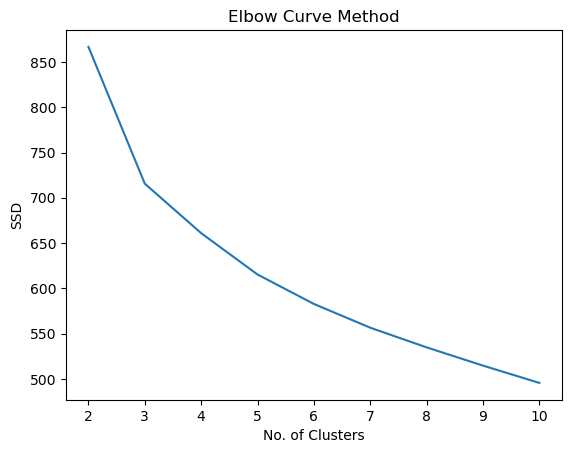


___________Silhouette Analysis___________



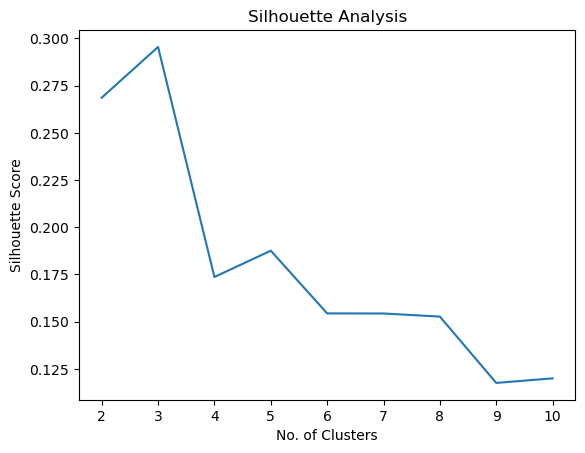


Cluster Labels are:
[0 1 0 ... 2 0 1]

Following are the Cluser groups within the dataset:
0    1049
1     446
2     137
Name: Cluster_Id, dtype: int64


In [80]:
Cluster_kmeans(DW_Economic_Growth,0)

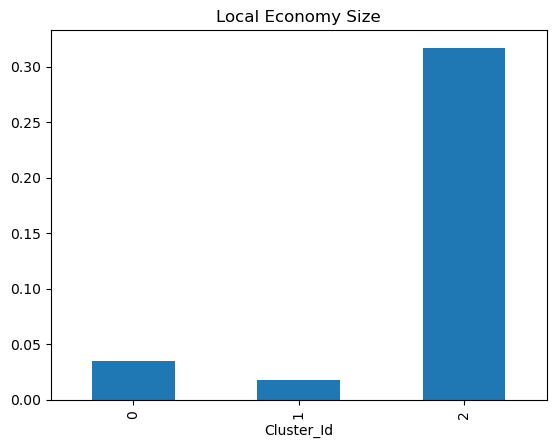

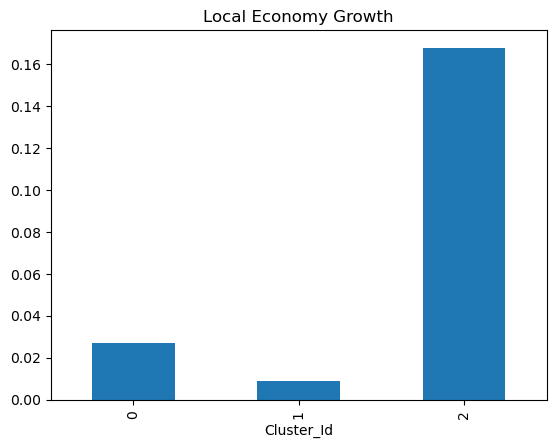

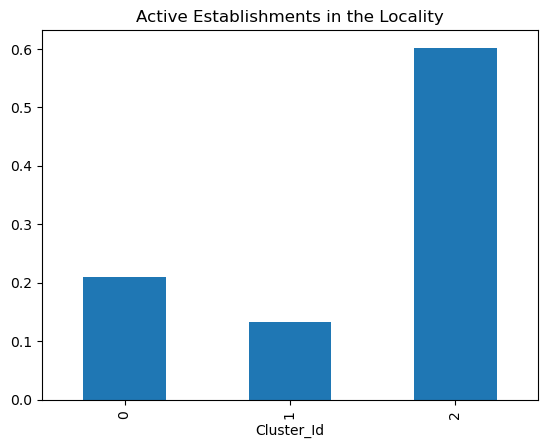

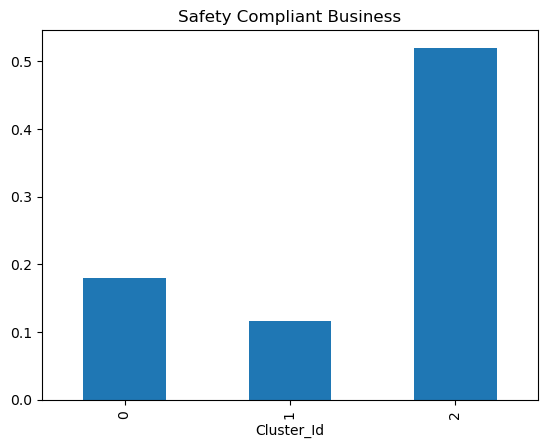

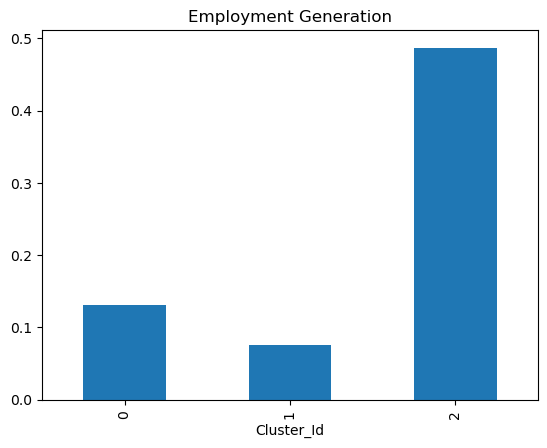

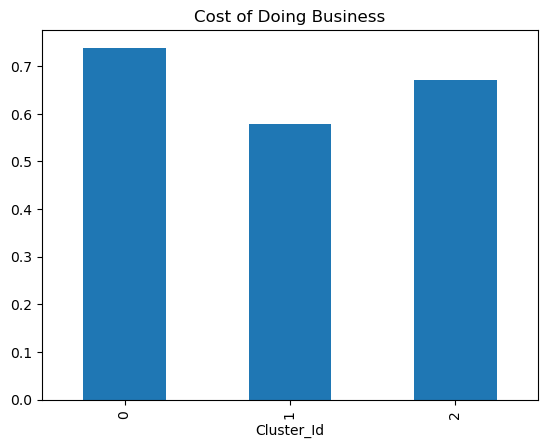

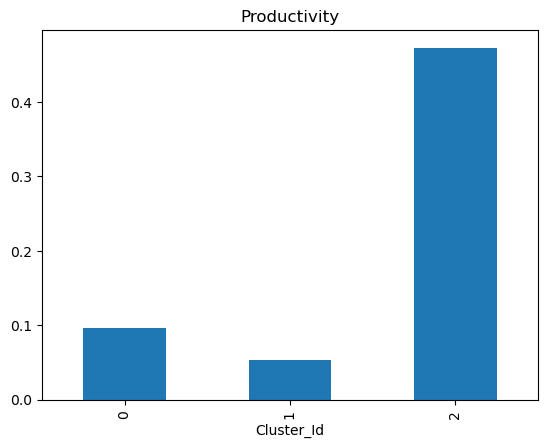

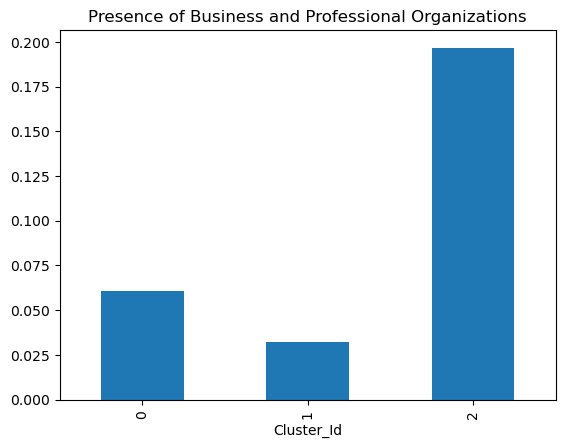

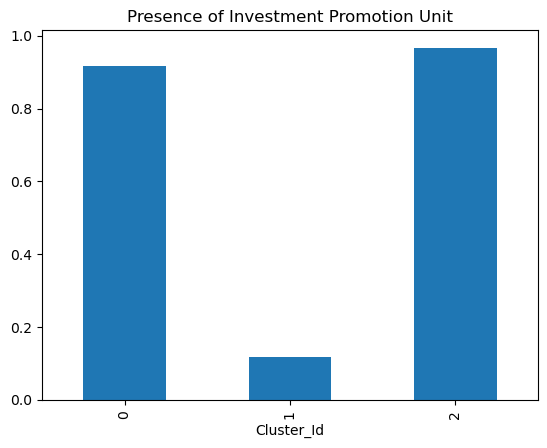

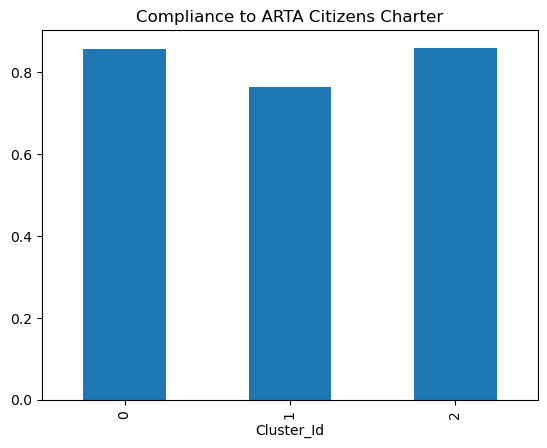

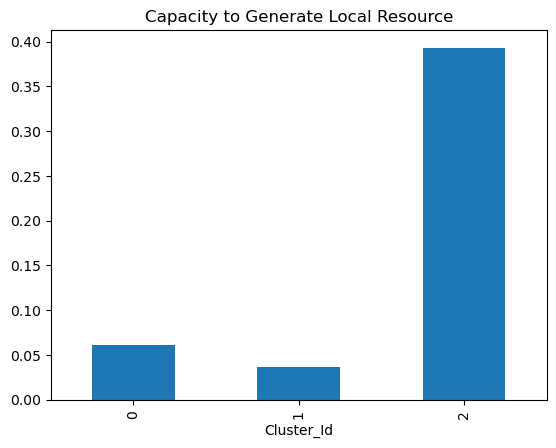

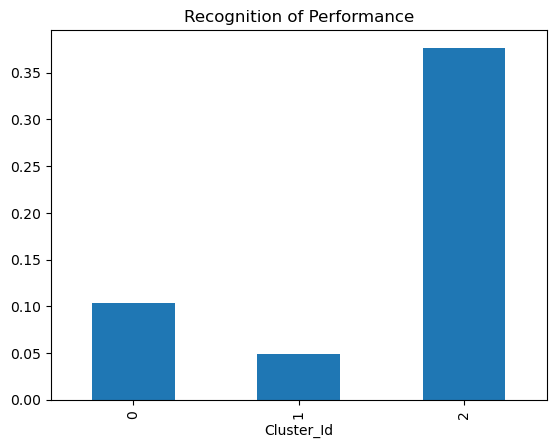

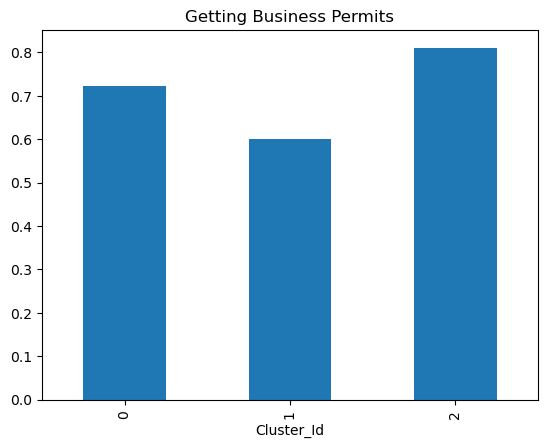

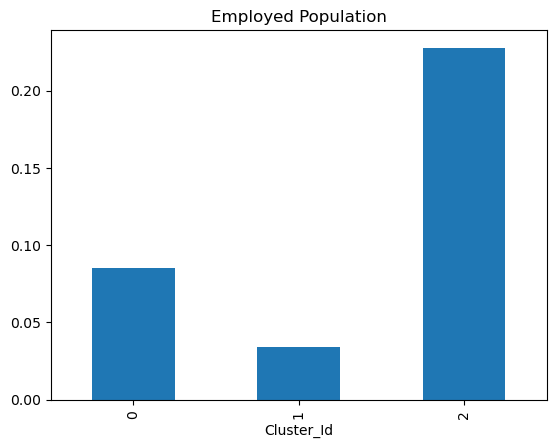

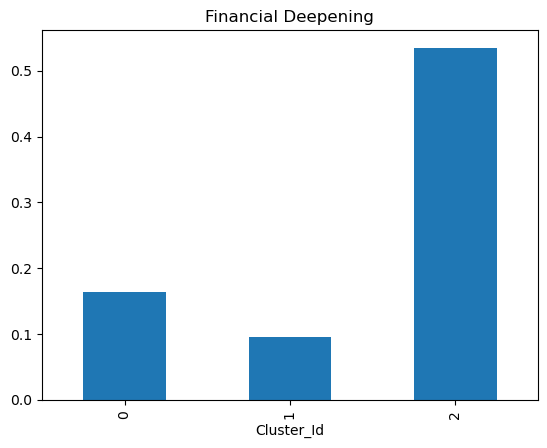

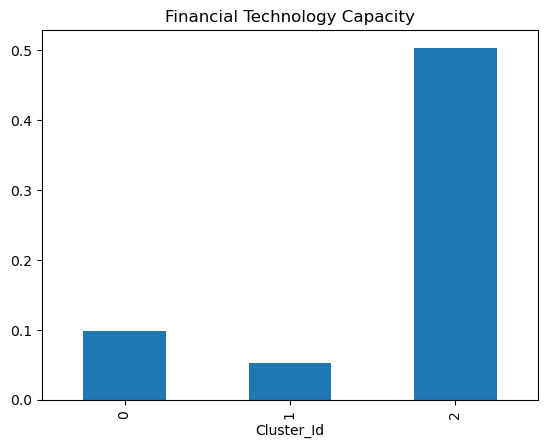

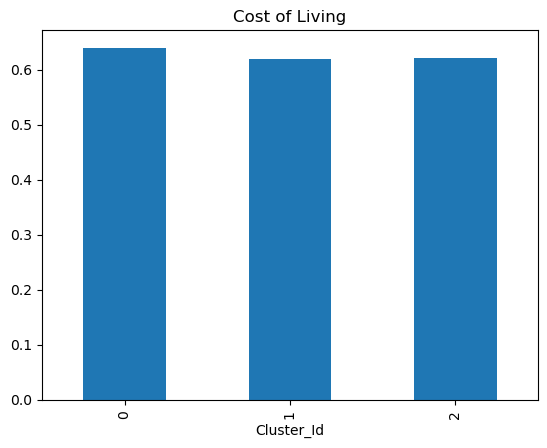

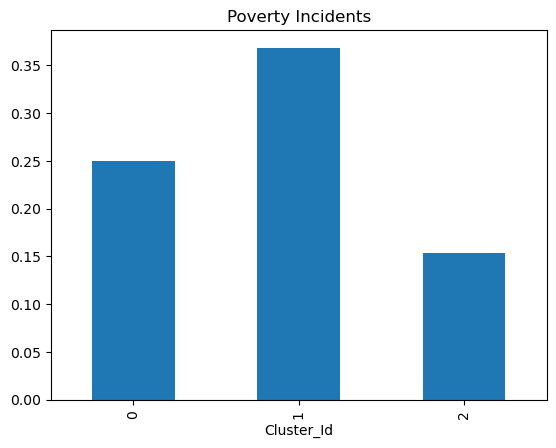

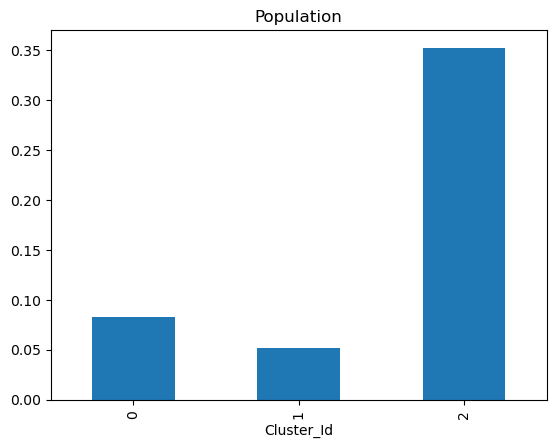

In [81]:
for col in DW_Economic_Growth.columns.drop('Cluster_Id'):
    DW_Economic_Growth[col].groupby(DW_Economic_Growth['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

### 2.1(b) Feature selection for Decent Work and Economic Growth

In [82]:
feature_selection(DW_Economic_Growth)

Fitting 4 folds for each of 75 candidates, totalling 300 fits

Our best estimator is:
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

Score of the best estimator is:
0.9684854619065145

____________Let's Validate the model with the test data:____________

Test Accuracy:
0.9714285714285714

____________Feature Importance:____________
                                              Varname       Imp
8               Presence of Investment Promotion Unit  0.547441
2               Active Establishments in the Locality  0.069265
6                                        Productivity  0.063621
4                               Employment Generation  0.039286
15                      Financial Technology Capacity  0.032366
5                              Cost of Doing Business  0.031331
14                                Financial Deepening  0.027326
10                Capacity to Generate Local Resource  0.026719
7   Presenc

### 2.2(a) Initial clustering for Disaster


Hopkins Statistics for this Pillar is 0.8811754256087436

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


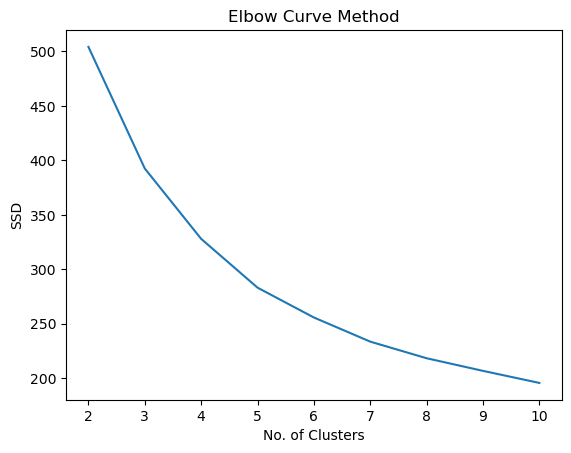


___________Silhouette Analysis___________



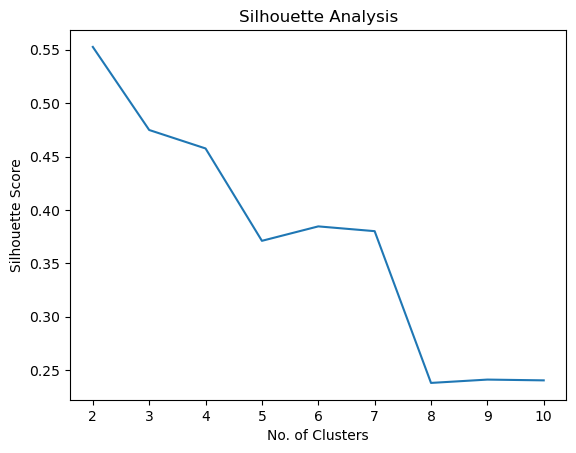


Cluster Labels are:
[1 1 1 ... 1 1 1]

Following are the Cluser groups within the dataset:
1    1381
2     143
0     108
Name: Cluster_Id, dtype: int64


In [83]:
Cluster_kmeans(Disaster,0)

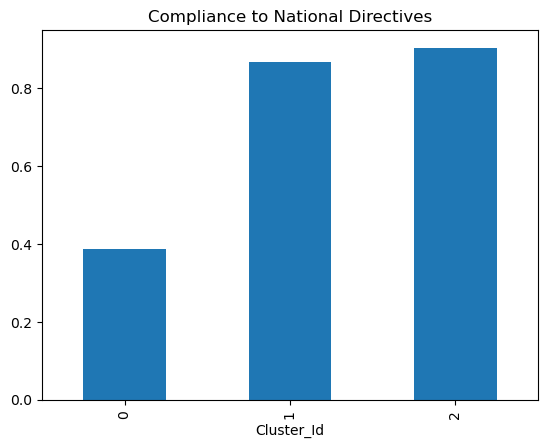

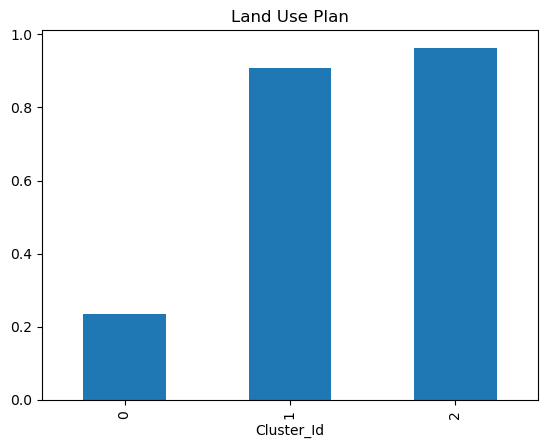

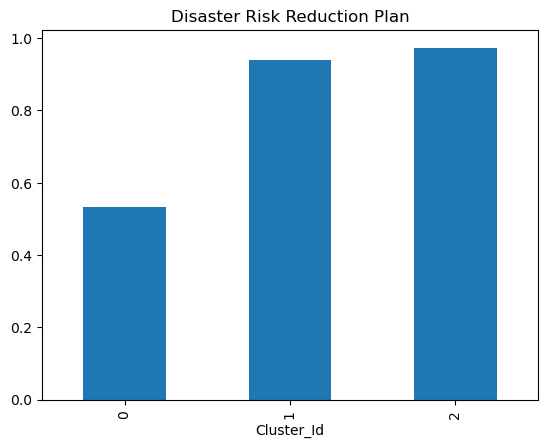

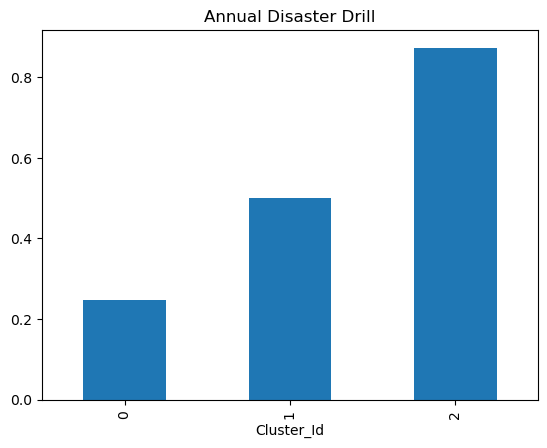

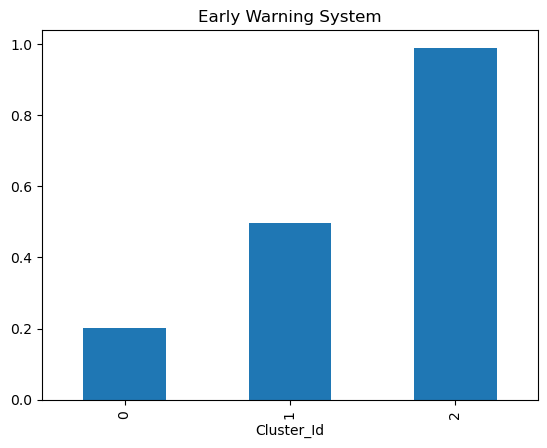

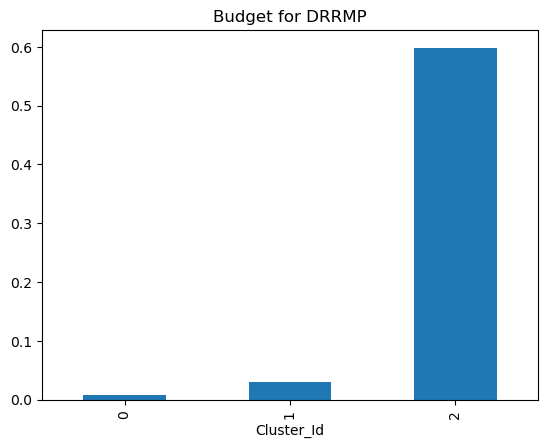

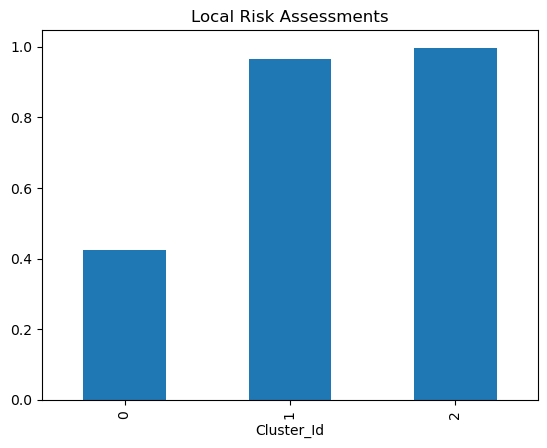

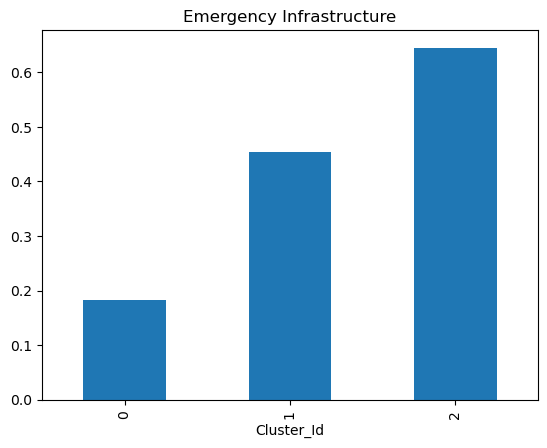

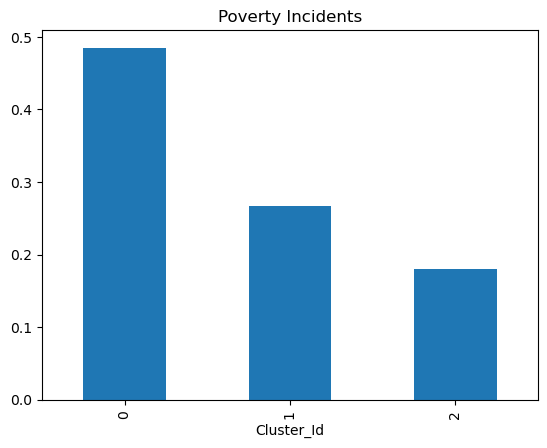

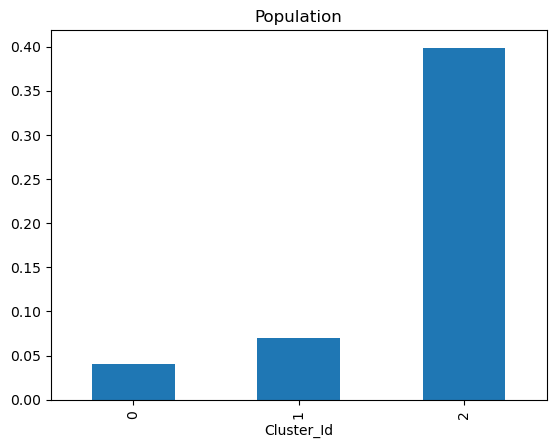

In [84]:
for col in Disaster.columns.drop('Cluster_Id'):
    Disaster[col].groupby(Disaster['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

### 2.2(b) Feature selection for Disaster

In [85]:
feature_selection(Disaster)

Fitting 4 folds for each of 75 candidates, totalling 300 fits

Our best estimator is:
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

Score of the best estimator is:
0.9772328548644338

____________Let's Validate the model with the test data:____________

Test Accuracy:
0.9734693877551021

____________Feature Importance:____________
                             Varname       Imp
4               Early Warning System  0.241431
5                   Budget for DRRMP  0.211461
1                      Land Use Plan  0.160708
3              Annual Disaster Drill  0.117956
6             Local Risk Assessments  0.107621
2       Disaster Risk Reduction Plan  0.077595
0  Compliance to National Directives  0.029880
9                         Population  0.025214
7           Emergency Infrastructure  0.021928
8                  Poverty Incidents  0.006206


### 2.3(a) Initial clustering for Industry Innovation and Infrastructure


Hopkins Statistics for this Pillar is 0.8275178314831483

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


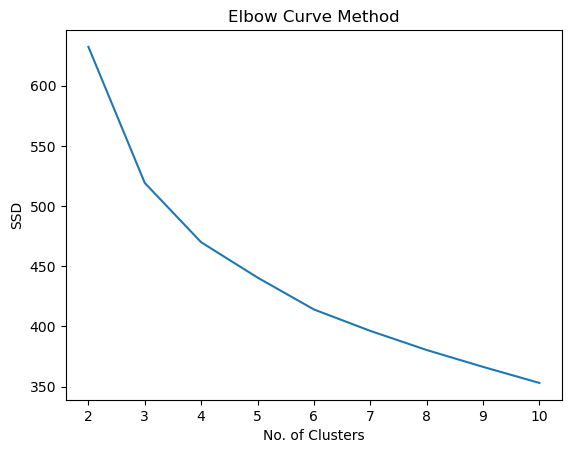


___________Silhouette Analysis___________



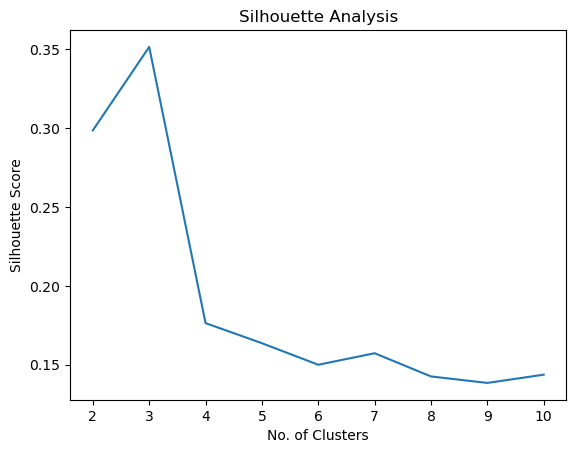


Cluster Labels are:
[1 1 1 ... 1 1 0]

Following are the Cluser groups within the dataset:
1    1234
0     280
2     118
Name: Cluster_Id, dtype: int64


In [86]:
Cluster_kmeans(Industry_II,0)

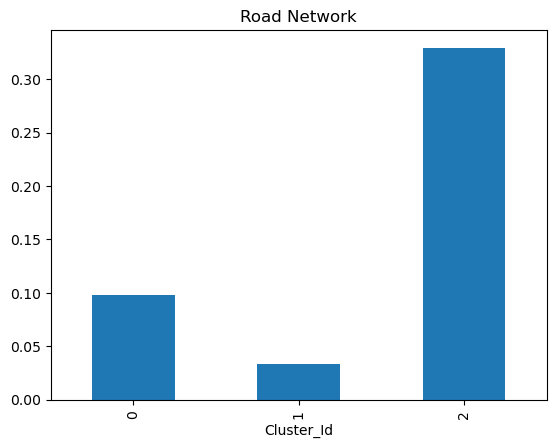

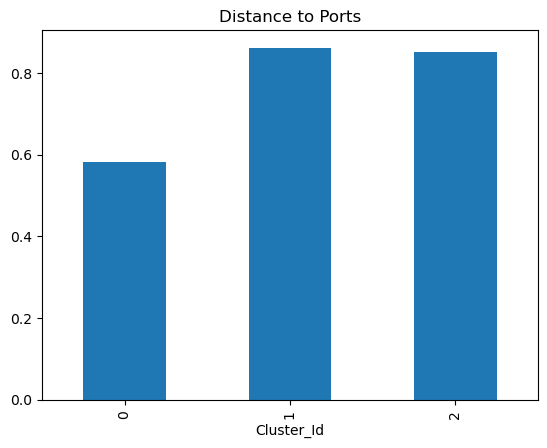

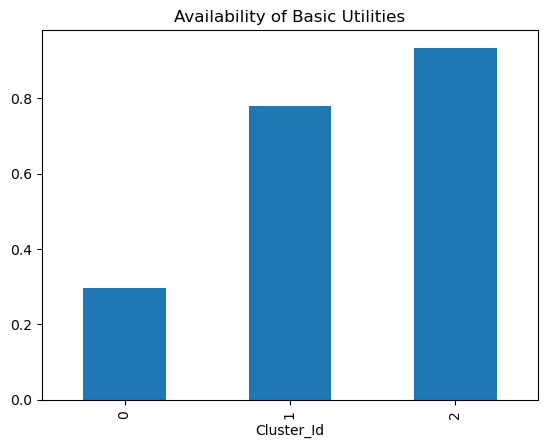

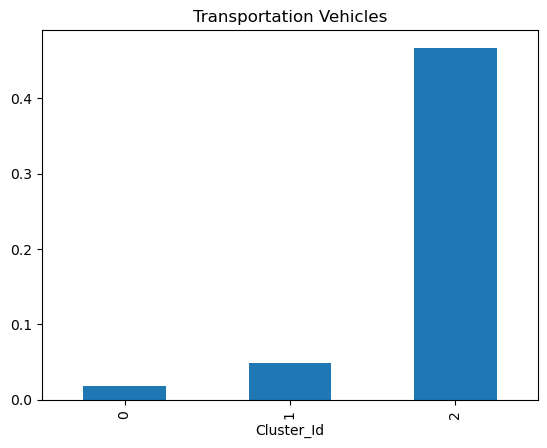

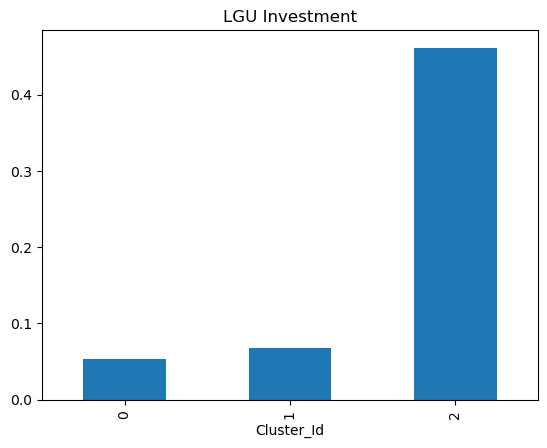

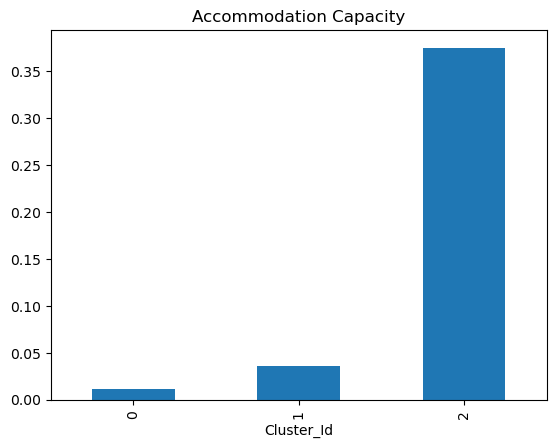

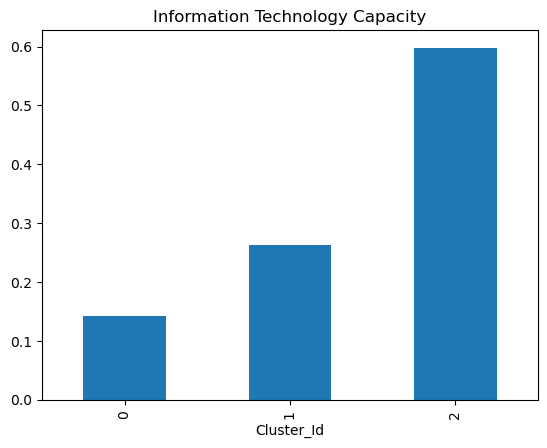

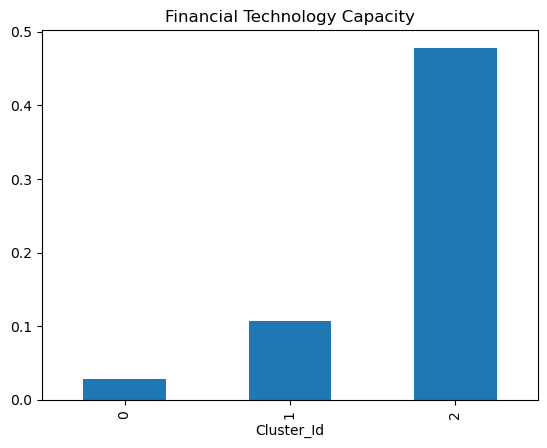

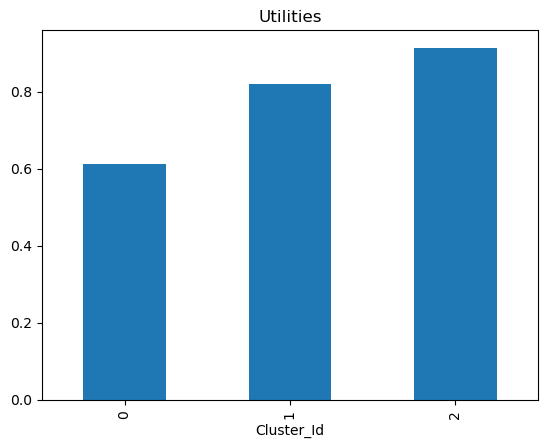

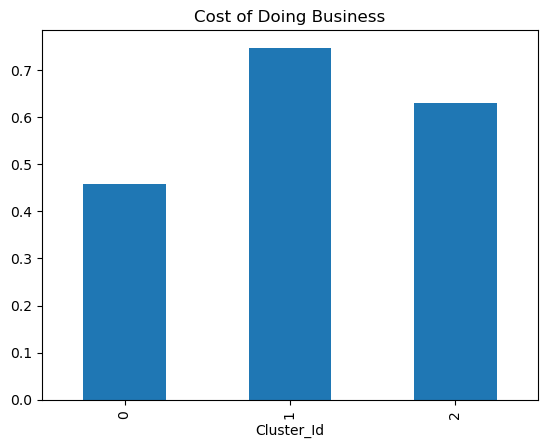

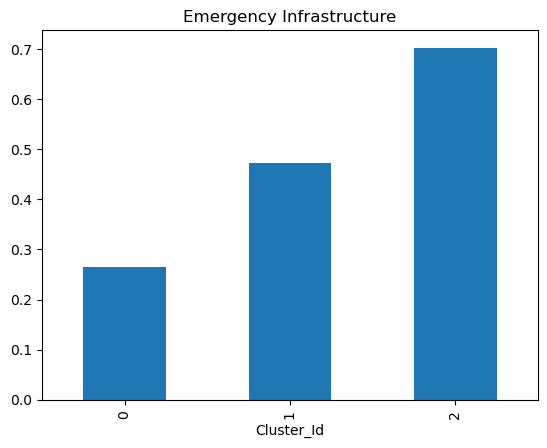

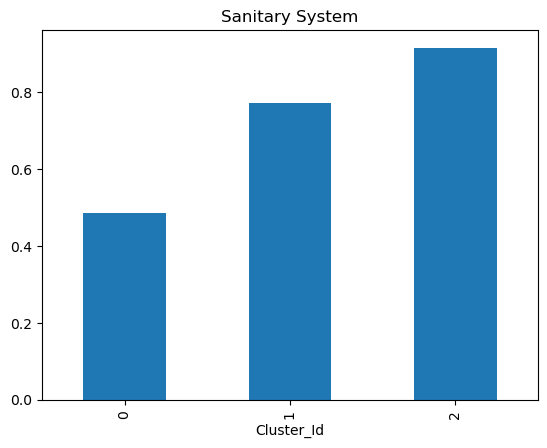

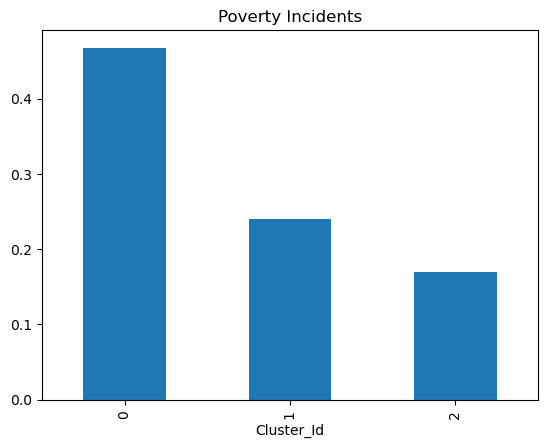

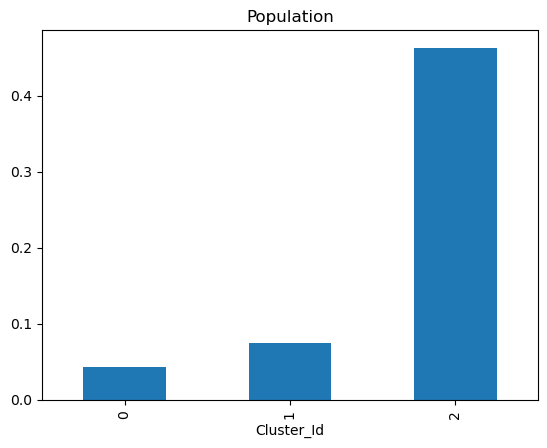

In [87]:
for col in Industry_II.columns.drop('Cluster_Id'):
    Industry_II[col].groupby(Industry_II['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

### 2.3(b) Feature selection for Industry Innovation and Infrastructure

In [88]:
feature_selection(Industry_II)

Fitting 4 folds for each of 75 candidates, totalling 300 fits

Our best estimator is:
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

Score of the best estimator is:
0.946564838670102

____________Let's Validate the model with the test data:____________

Test Accuracy:
0.9306122448979591

____________Feature Importance:____________
                            Varname       Imp
2   Availability of Basic Utilities  0.289501
9            Cost of Doing Business  0.146258
3           Transportation Vehicles  0.075515
1                 Distance to Ports  0.074379
8                         Utilities  0.068484
4                    LGU Investment  0.062029
10         Emergency Infrastructure  0.053756
13                       Population  0.048508
11                  Sanitary System  0.040723
7     Financial Technology Capacity  0.033403
0                      Road Network  0.033063
6   Information Technology Capacity 

### 2.4(a) intial clustering for Healthcare


Hopkins Statistics for this Pillar is 0.8801735572012843

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


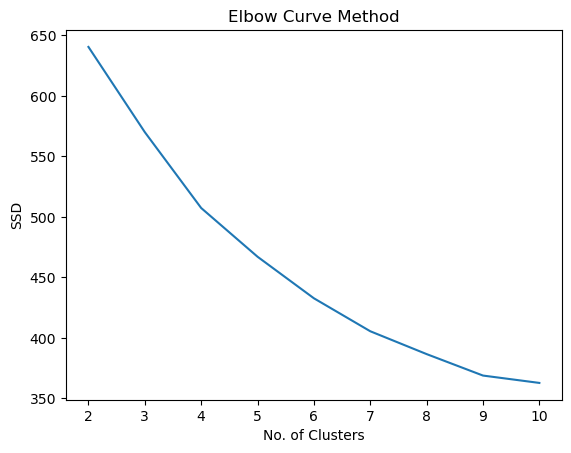


___________Silhouette Analysis___________



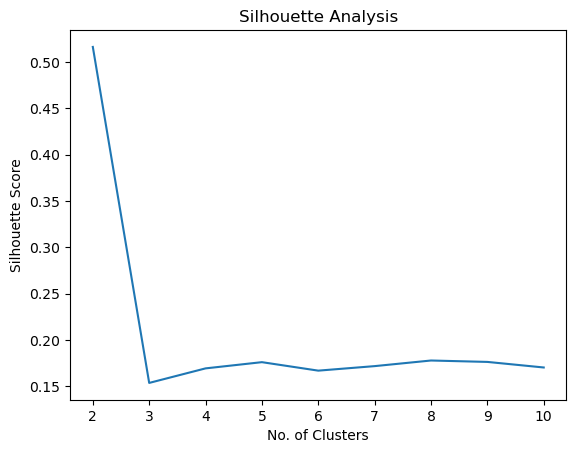


Cluster Labels are:
[1 2 2 ... 2 2 1]

Following are the Cluser groups within the dataset:
2    867
1    595
0    170
Name: Cluster_Id, dtype: int64


In [89]:
Cluster_kmeans(Healthcare,0)

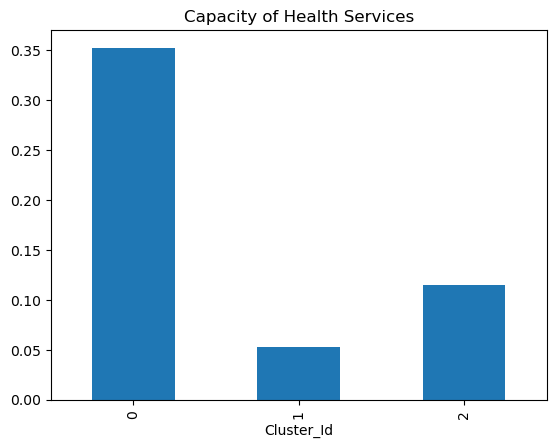

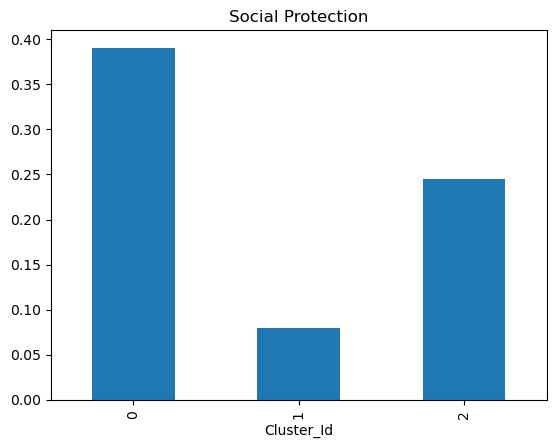

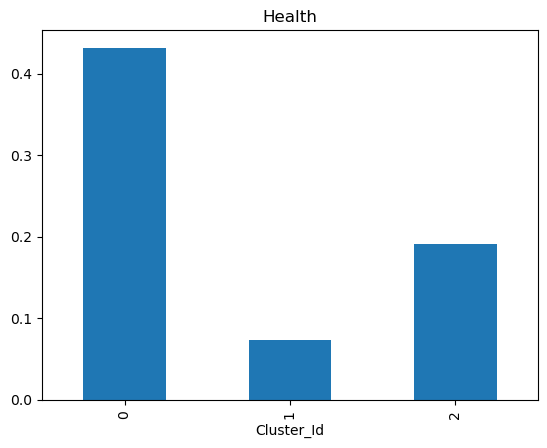

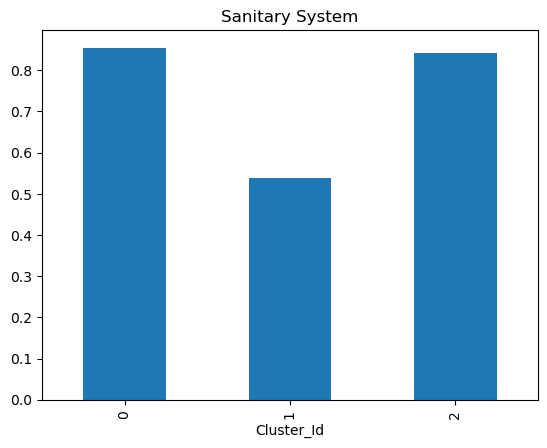

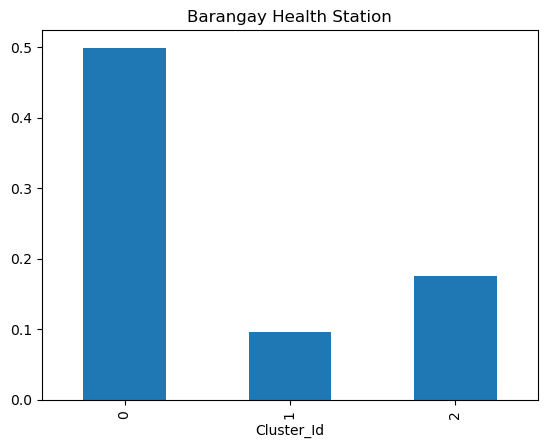

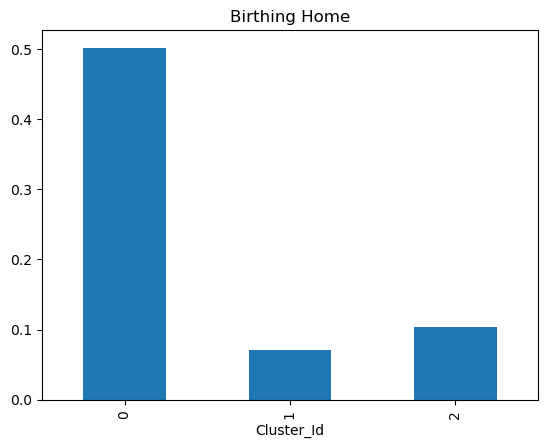

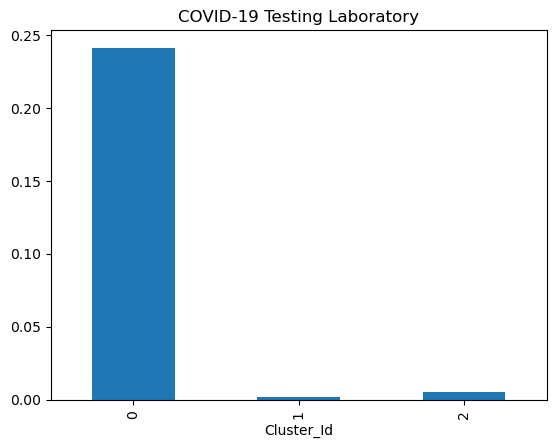

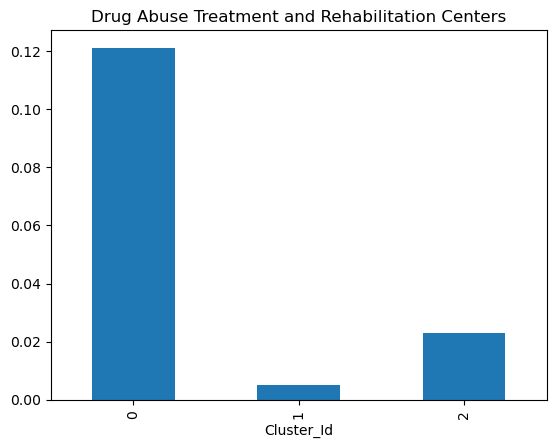

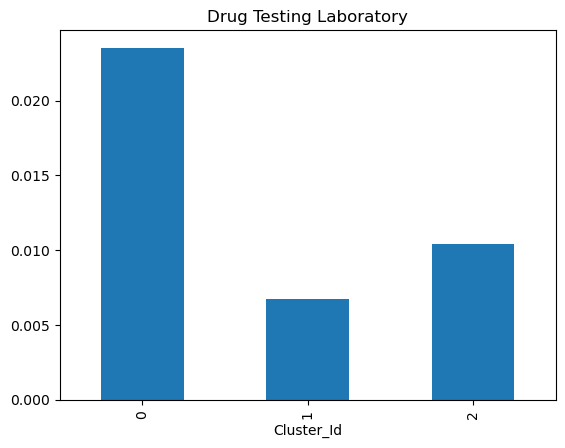

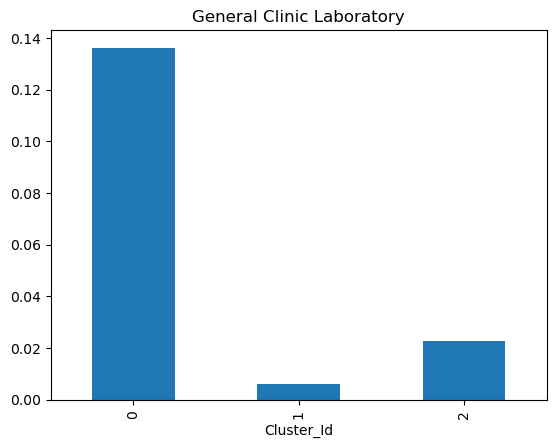

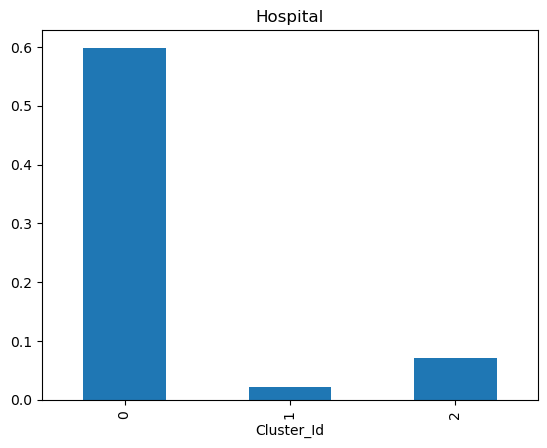

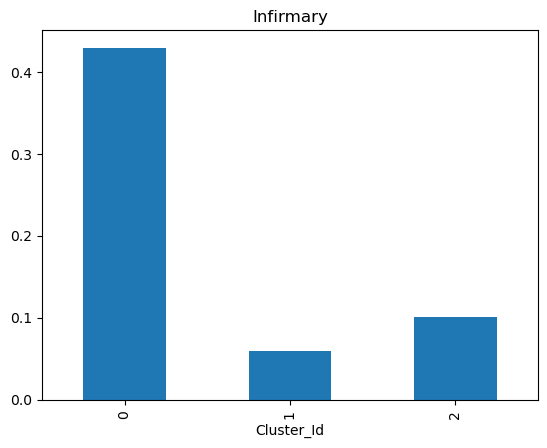

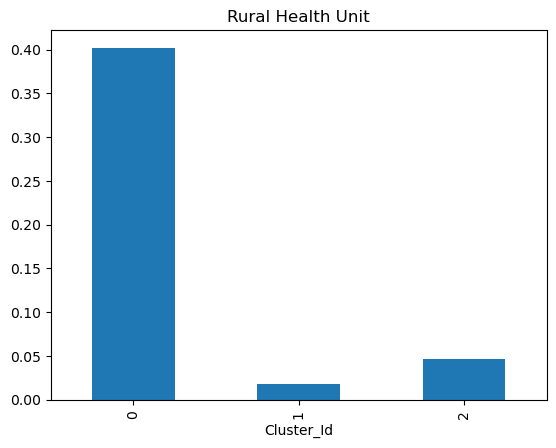

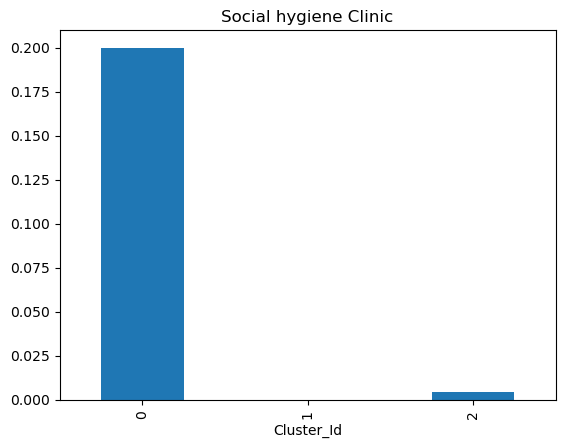

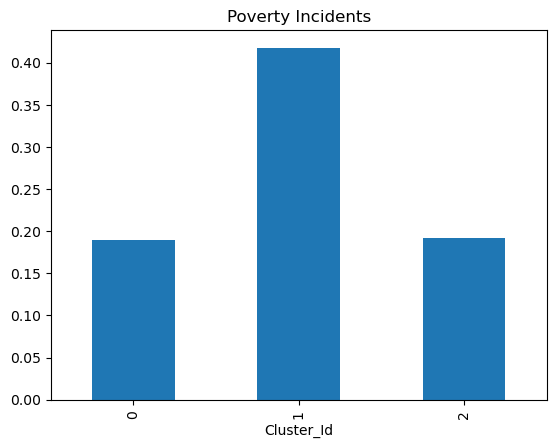

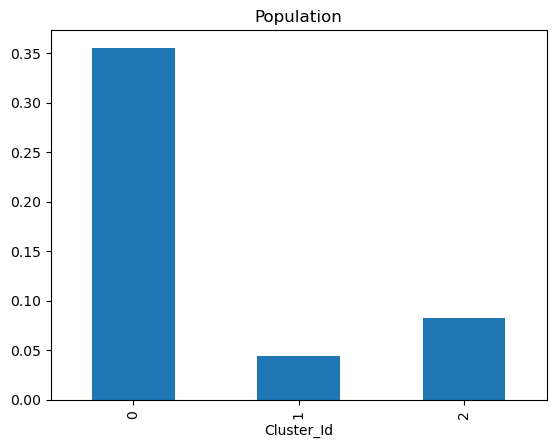

In [90]:
for col in Healthcare.columns.drop('Cluster_Id'):
    Healthcare[col].groupby(Healthcare['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

### 2.4(b) Feature selection for Healthcare

In [91]:
feature_selection(Healthcare)

Fitting 4 folds for each of 75 candidates, totalling 300 fits

Our best estimator is:
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

Score of the best estimator is:
0.9220709115445958

____________Let's Validate the model with the test data:____________

Test Accuracy:
0.9387755102040817

____________Feature Importance:____________
                                            Varname       Imp
3                                   Sanitary System  0.278710
1                                 Social Protection  0.151773
10                                         Hospital  0.125483
14                                Poverty Incidents  0.111663
2                                            Health  0.075254
4                           Barangay Health Station  0.058689
15                                       Population  0.055159
12                                Rural Health Unit  0.048571
5                            

### 2.5(a) Initial clustering for Poverty


Hopkins Statistics for this Pillar is 0.8720492919668231

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


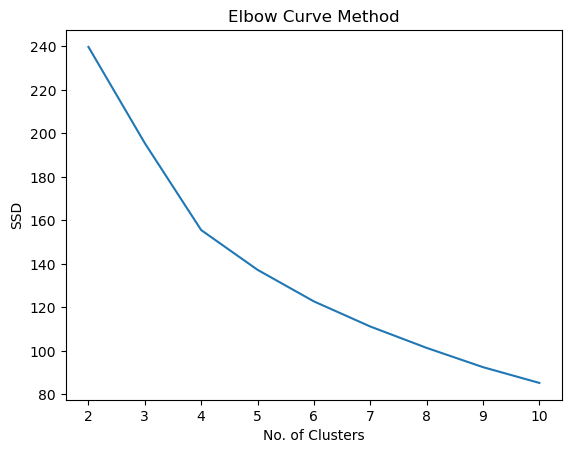


___________Silhouette Analysis___________



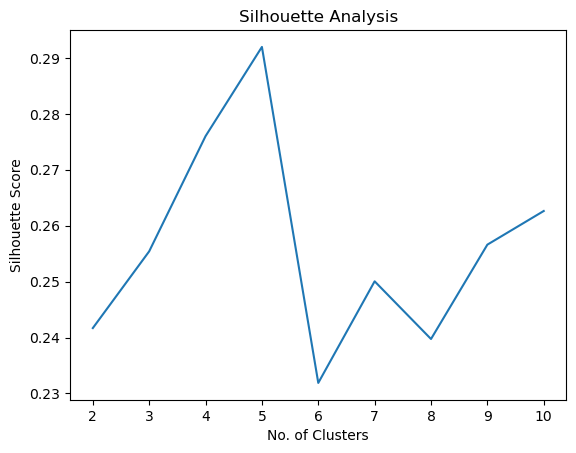


Cluster Labels are:
[1 1 0 ... 1 1 2]

Following are the Cluser groups within the dataset:
1    813
0    572
2    247
Name: Cluster_Id, dtype: int64


In [92]:
Cluster_kmeans(Poverty,0)

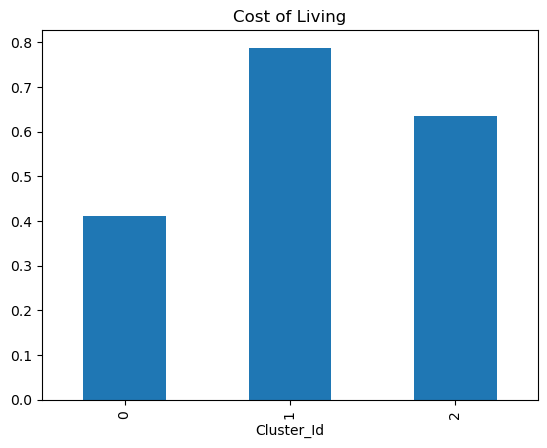

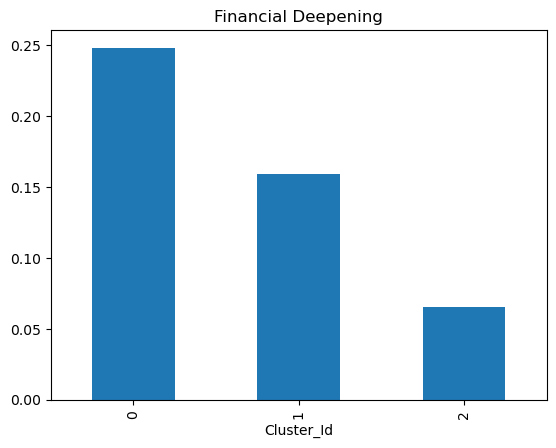

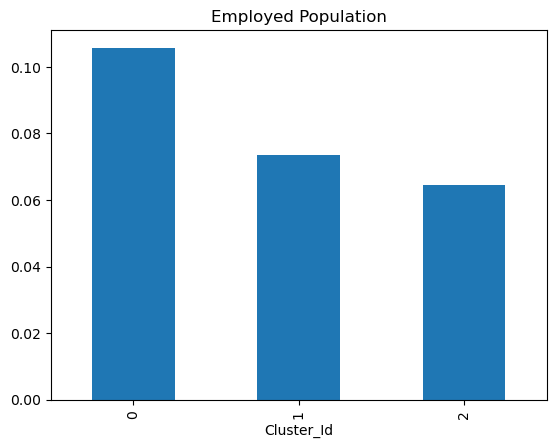

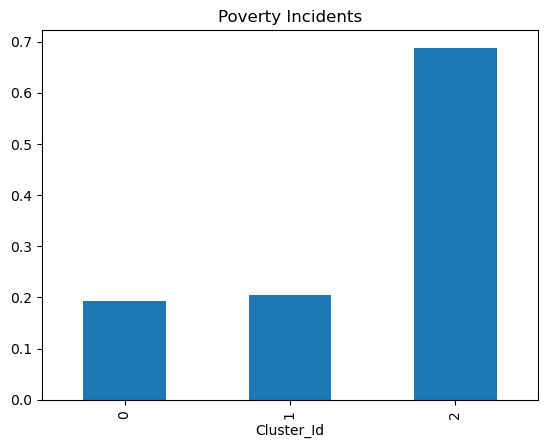

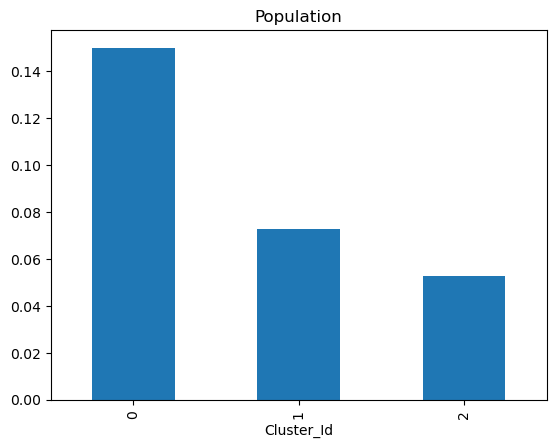

In [93]:
for col in Poverty.columns.drop('Cluster_Id'):
    Poverty[col].groupby(Poverty['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

### 2.5(b) Feature selection for Poverty

In [94]:
feature_selection(Poverty)

Fitting 4 folds for each of 75 candidates, totalling 300 fits

Our best estimator is:
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

Score of the best estimator is:
0.9527174579806158

____________Let's Validate the model with the test data:____________

Test Accuracy:
0.9673469387755103

____________Feature Importance:____________
               Varname       Imp
0       Cost of Living  0.566899
3    Poverty Incidents  0.287820
4           Population  0.066922
1  Financial Deepening  0.066201
2  Employed Population  0.012158


### So after the feature selection exercise, we got the following top 4 features per pillar. The 5th feature will be poverty for every pillar. We will use these in the final Clustering model.

#### DW_Economic_Growth
- Presence of Investment Promotion Unit
- Active Establishments in the Locality
- Productivity
- Cost of Doing Business
- Poverty Incidents

#### Disaster
- Budget for DRRMP
- Early Warning System
- Land Use Plan
- Annual Disaster Drill
- Poverty Incidents

#### Industry_II
- Availability of Basic Utilities
- Utilities
- Transportation Vehicles
- Cost of Doing Business
- Poverty Incidents


#### Healthcare
- Sanitary System
- Poverty Incidents
- Social Protection
- Hospital
- Health
   
#### Poverty
- Cost of Living     
- Poverty Incidents
- Population
- Financial Deepening
- Employed Population


## 3. Modelling Using Kmeans Clustering
#### In this section we will be running clustering for each of the below 5 Pillars based on the there respective features. Finally we will be generating pickle files for each of the pillar models. These will be used in Streamlit App.

#### Let's create the required dataframes for each of the pillars with the selected features.

In [95]:
#Decent Work and Economic Growth
DW_Economic_Growth_final = dti_consolidated_Scaled[["Presence of Investment Promotion Unit","Active Establishments in the Locality",
                                              "Productivity","Employment Generation","Poverty Incidents"]]

#Disaster
Disaster_final = dti_consolidated_Scaled[["Early Warning System","Budget for DRRMP","Land Use Plan","Annual Disaster Drill",
                                    "Poverty Incidents"]]

#Industry Innovation and Infrastructure
Industry_II_final = dti_consolidated_Scaled[["Availability of Basic Utilities","Cost of Doing Business","Transportation Vehicles",
                                             "Distance to Ports","Poverty Incidents"]]
#Healthcare
Healthcare_final = dti_consolidated_Scaled[["Sanitary System","Social Protection","Hospital","Poverty Incidents","Health"]]
#Poverty                              
Poverty_final = dti_consolidated_Scaled[['Cost of Living',"Poverty Incidents","Population","Financial Deepening",'Employed Population']]


### 3.1 Clustering for Decent Work and Economic Growth


Hopkins Statistics for this Pillar is 0.8918914381613559

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


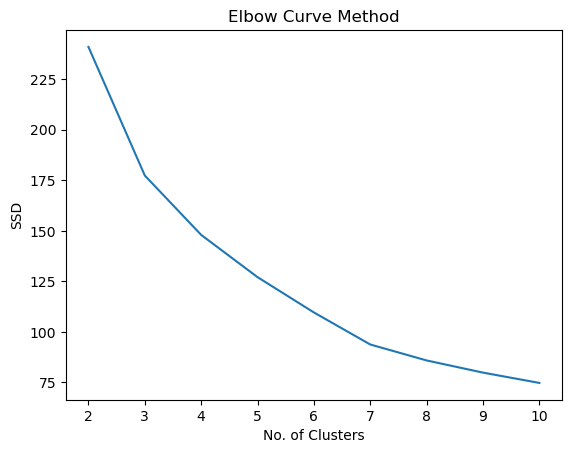


___________Silhouette Analysis___________



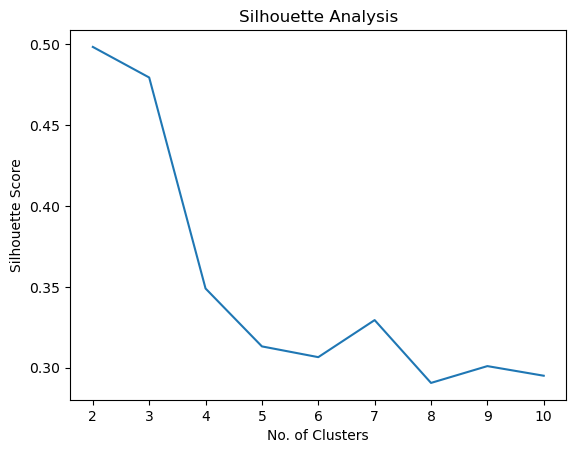


Cluster Labels are:
[0 1 2 ... 0 0 1]

Following are the Cluser groups within the dataset:
0    1024
1     472
2     136
Name: Cluster_Id, dtype: int64


In [96]:
Cluster_kmeans(DW_Economic_Growth_final,1,'dweg.pkl')

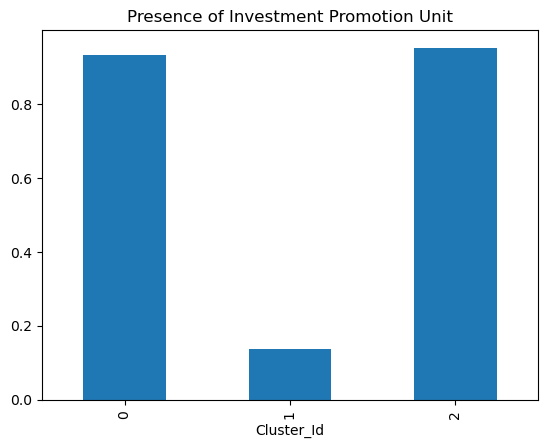

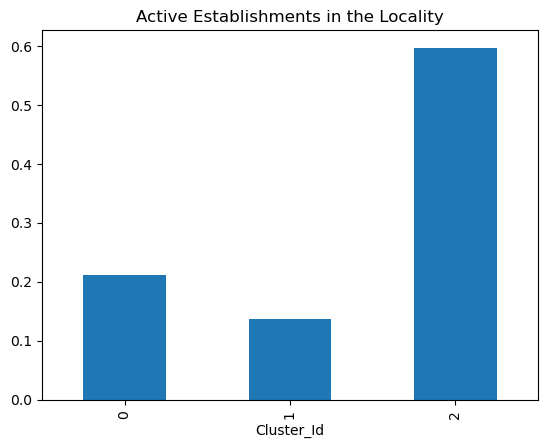

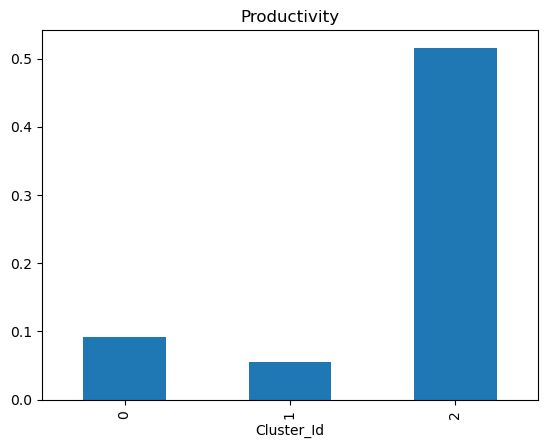

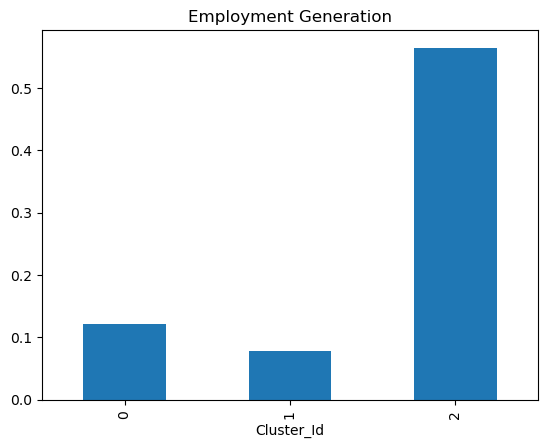

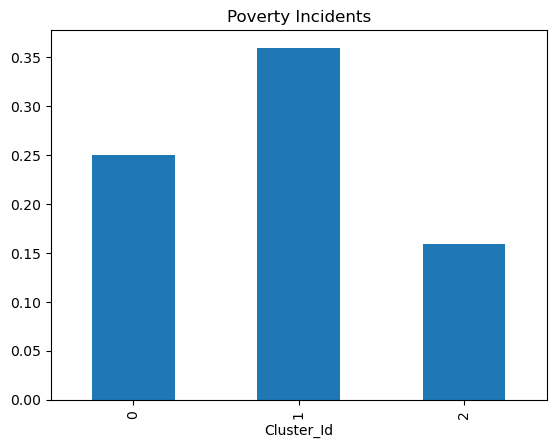

In [97]:
# Cluster Profiling
for col in DW_Economic_Growth_final.columns.drop('Cluster_Id'):
    DW_Economic_Growth_final[col].groupby(DW_Economic_Growth_final['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

Cluster Profile
- 2 - Low Vulnerability
- 0 - Medium Vulnerability
- 1 - High Vulnerability

### 3.2 Clustering for Disaster


Hopkins Statistics for this Pillar is 0.9250278999964476

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


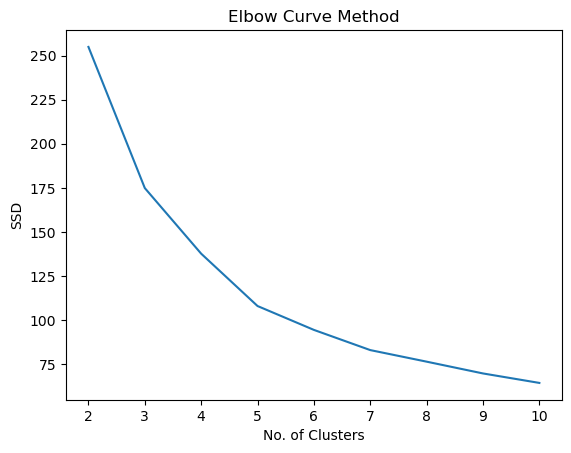


___________Silhouette Analysis___________



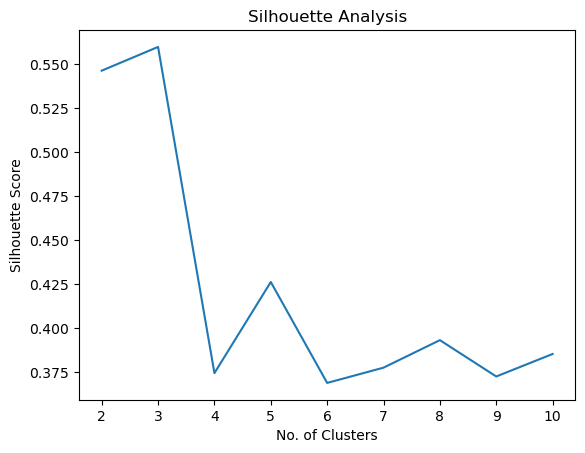


Cluster Labels are:
[0 0 0 ... 0 0 0]

Following are the Cluser groups within the dataset:
0    1349
1     142
2     141
Name: Cluster_Id, dtype: int64


In [98]:
Cluster_kmeans(Disaster_final,1,'disaster.pkl')

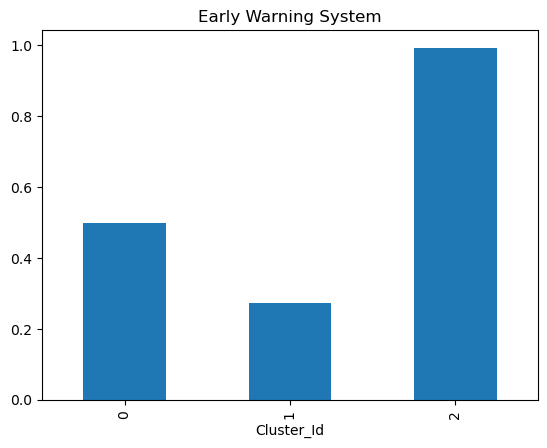

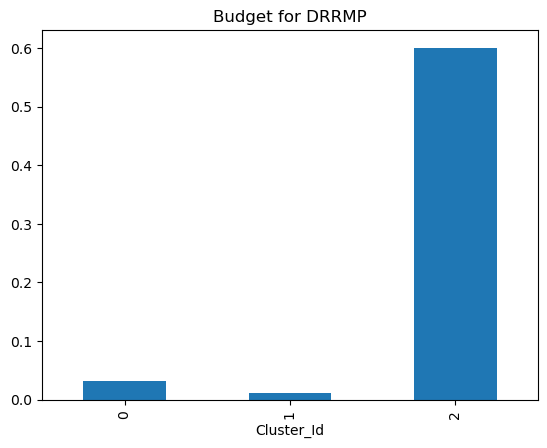

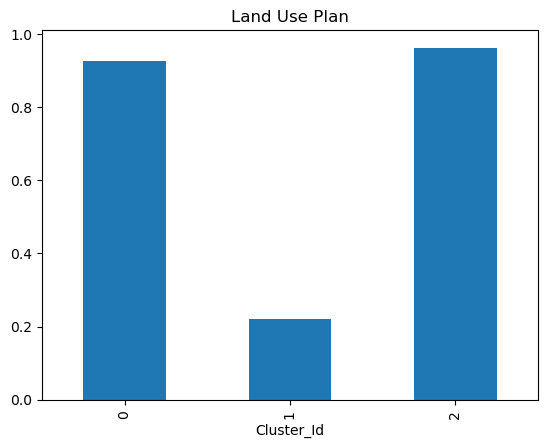

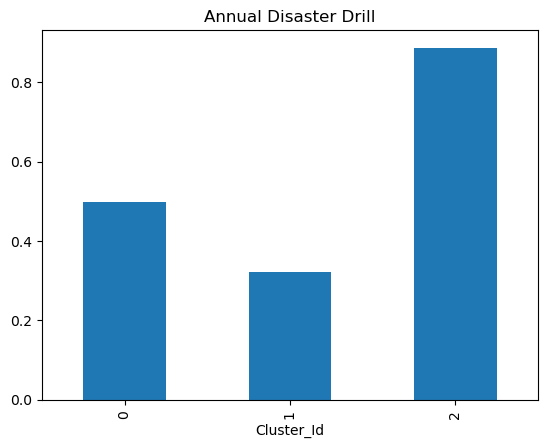

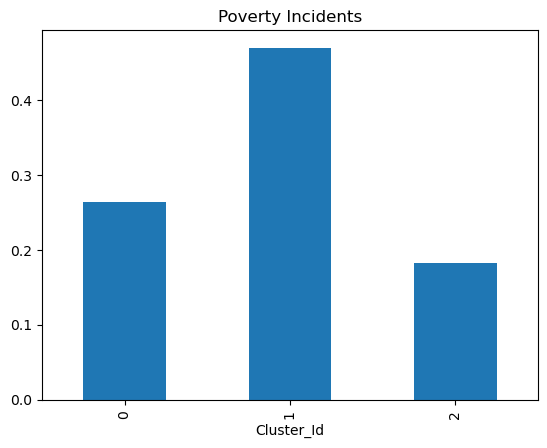

In [99]:
# Cluster Profiling
for col in Disaster_final.columns.drop('Cluster_Id'):
    Disaster_final[col].groupby(Disaster_final['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

Cluster Profile
- 2 - Low Vulnerability
- 0 - Medium Vulnerability
- 1 - High Vulnerability

### 3.3 Clustering for Industry Innovation and Infrastructure


Hopkins Statistics for this Pillar is 0.8668691095823418

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


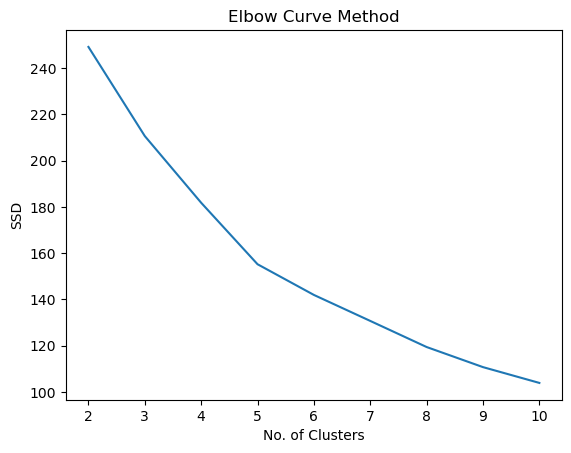


___________Silhouette Analysis___________



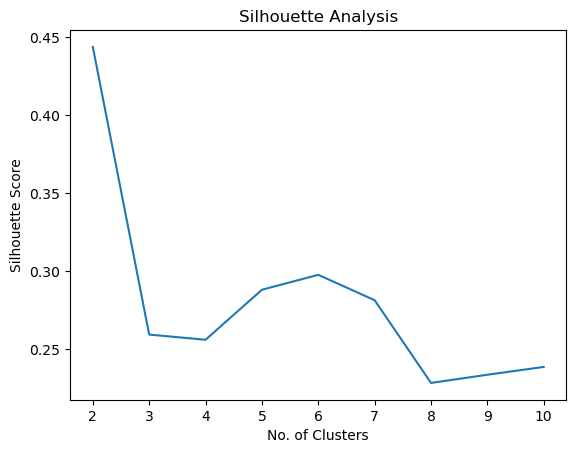


Cluster Labels are:
[0 0 0 ... 0 0 2]

Following are the Cluser groups within the dataset:
0    935
2    543
1    154
Name: Cluster_Id, dtype: int64


In [100]:
Cluster_kmeans(Industry_II_final,1,'industry_II.pkl')

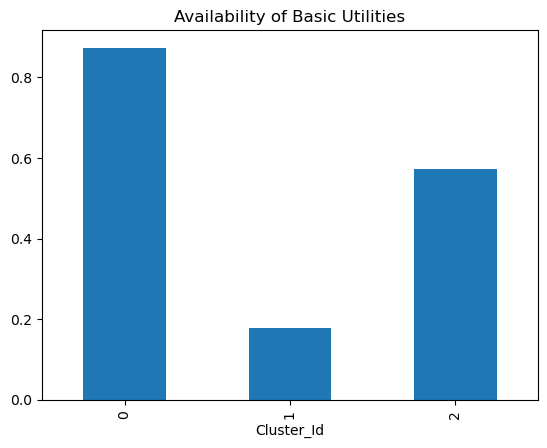

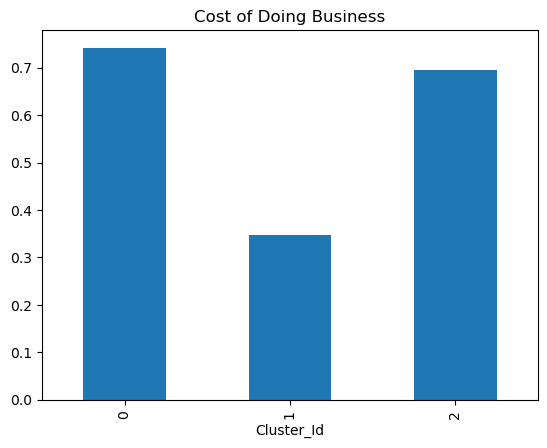

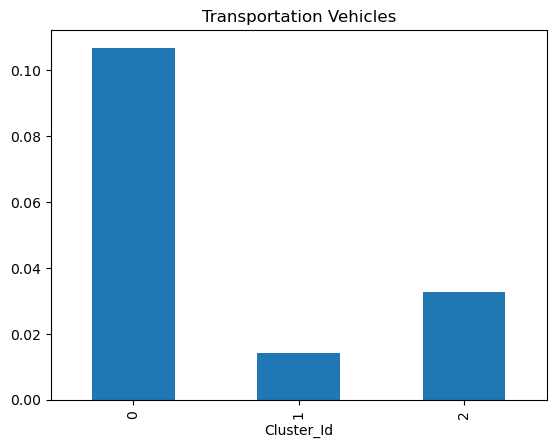

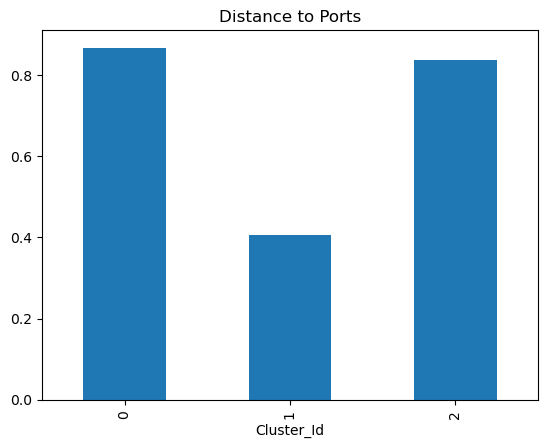

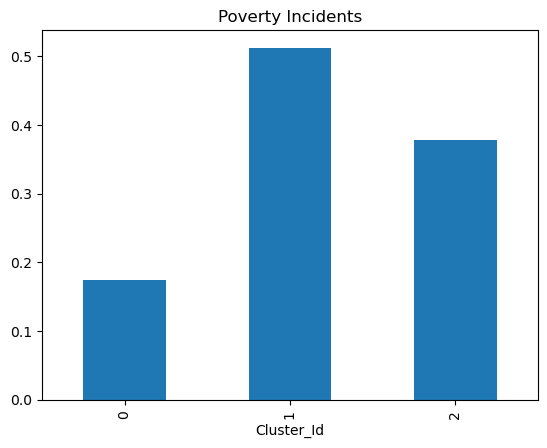

In [101]:
# Cluster Profiling
for col in Industry_II_final.columns.drop('Cluster_Id'):
    Industry_II_final[col].groupby(Industry_II_final['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

Cluster Profile
- 0 - Low Vulnerability
- 2 - Medium Vulnerability
- 1 - High Vulnerability

### 3.4 Clustering for Healthcare


Hopkins Statistics for this Pillar is 0.8551416925185893

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


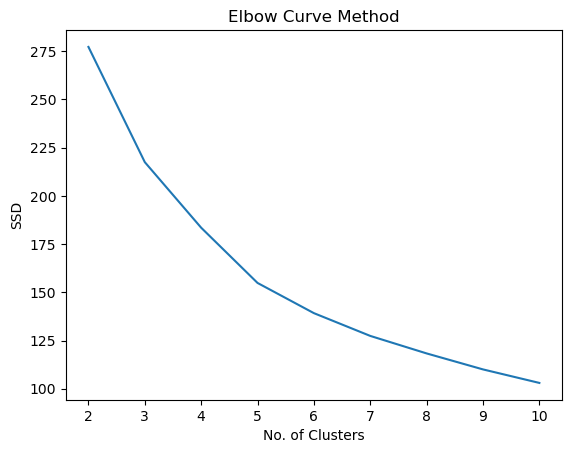


___________Silhouette Analysis___________



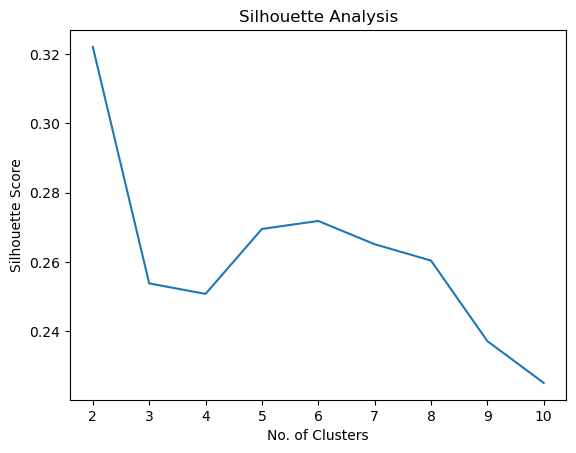


Cluster Labels are:
[2 0 0 ... 1 0 2]

Following are the Cluser groups within the dataset:
0    897
2    567
1    168
Name: Cluster_Id, dtype: int64


In [102]:
Cluster_kmeans(Healthcare_final,1,'health.pkl')

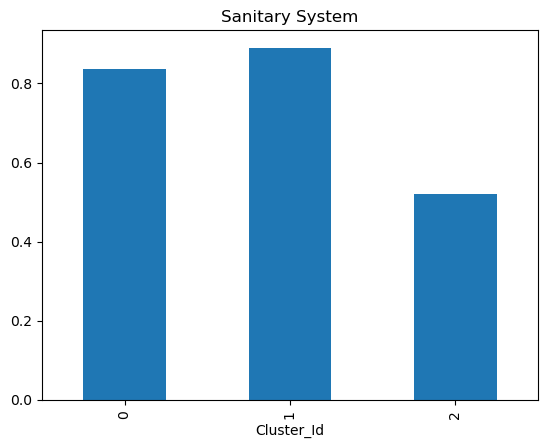

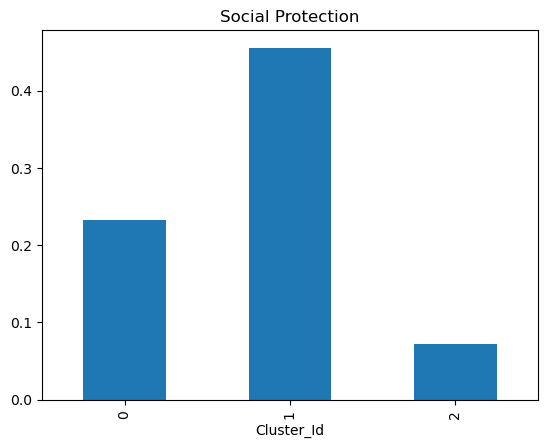

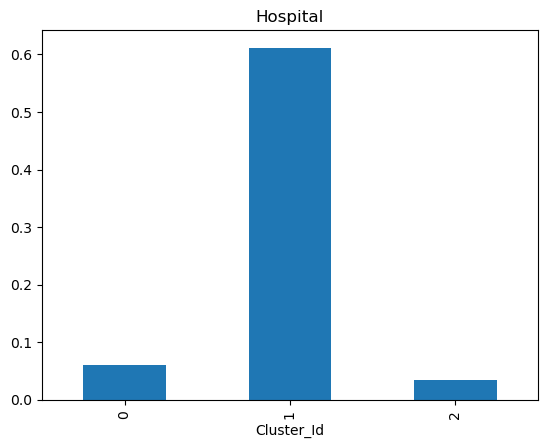

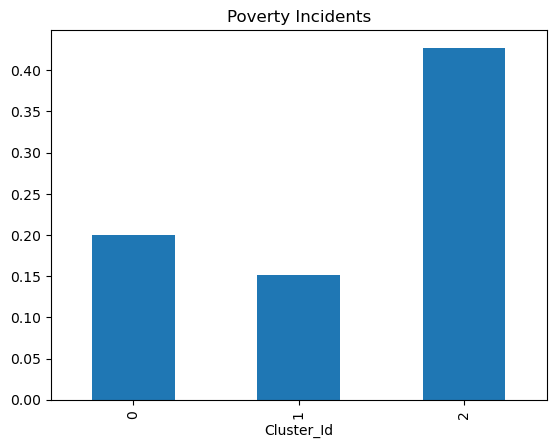

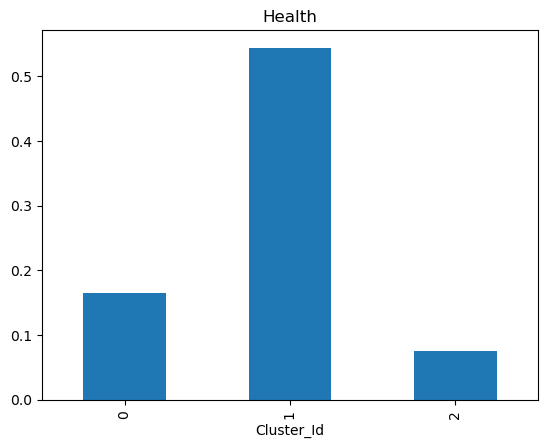

In [103]:
# Cluster Profiling
for col in Healthcare_final.columns.drop('Cluster_Id'):
    Healthcare_final[col].groupby(Healthcare_final['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

Cluster Profile
- 1 - Low Vulnerability
- 0 - Medium Vulnerability
- 2 - High Vulnerability

### 3.5 Clustering for Poverty


Hopkins Statistics for this Pillar is 0.8634834230209858

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


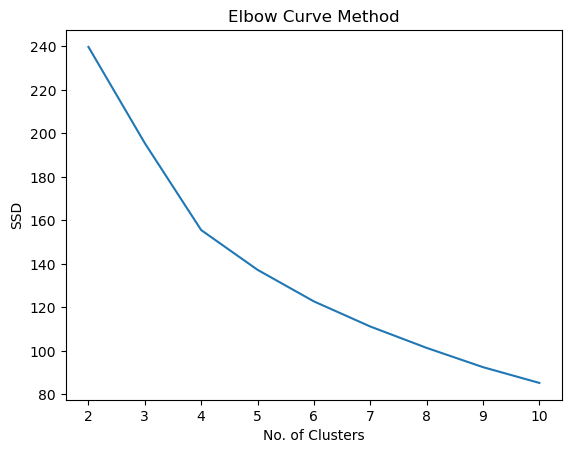


___________Silhouette Analysis___________



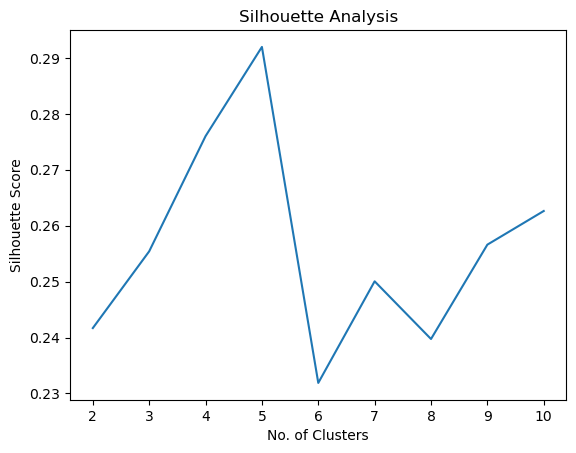


Cluster Labels are:
[1 1 0 ... 1 1 2]

Following are the Cluser groups within the dataset:
1    813
0    572
2    247
Name: Cluster_Id, dtype: int64


In [104]:
Cluster_kmeans(Poverty_final,1,'poverty.pkl')

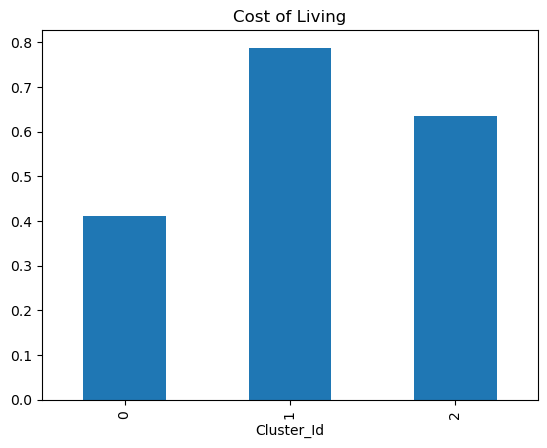

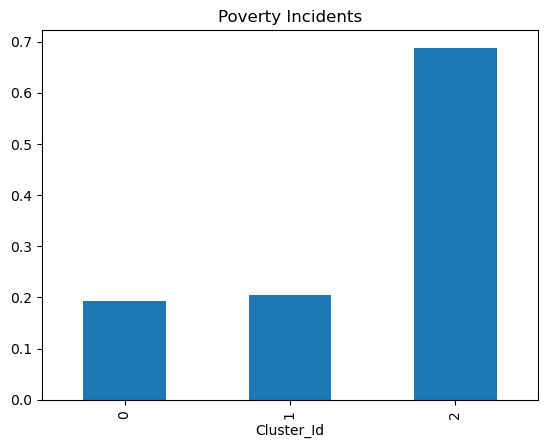

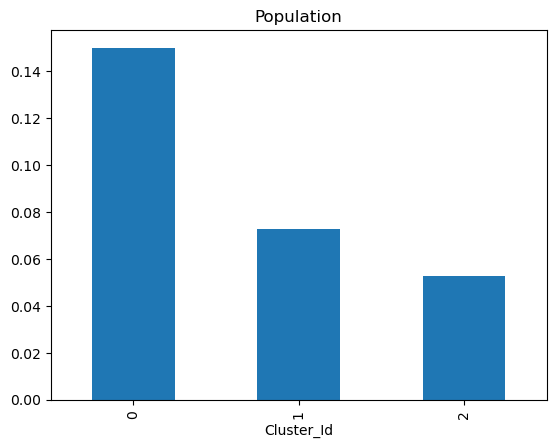

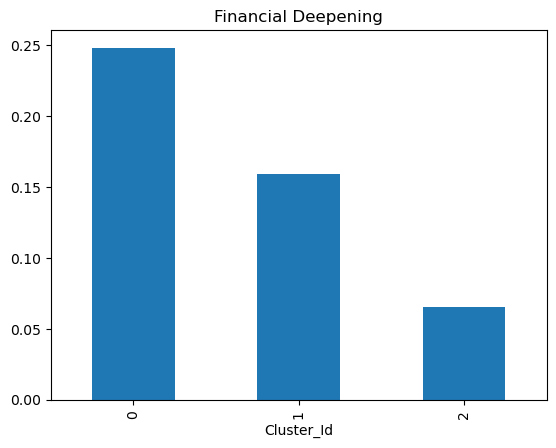

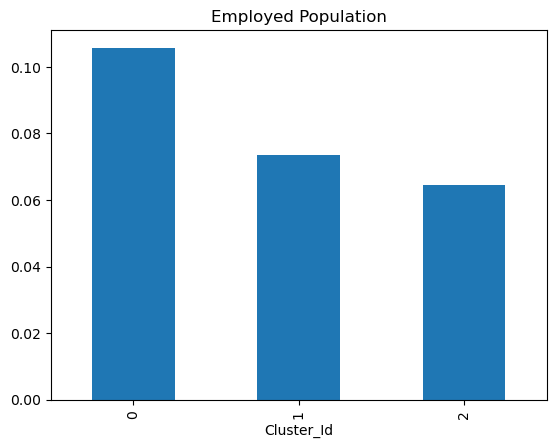

In [105]:
# Cluster Profiling
for col in Poverty_final.columns.drop('Cluster_Id'):
    Poverty_final[col].groupby(Poverty_final['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

Cluster Profile
- 0 - Low Vulnerability
- 1 - Medium Vulnerability
- 2 - High Vulnerability

#### Adding Vulnerability Column

In [106]:
DW_Economic_Growth_final['Vulnerability'] = DW_Economic_Growth_final['Cluster_Id'].apply(lambda x:'low' if x==2 else('medium'if x==0 else 'high'))
Disaster_final['Vulnerability'] = Disaster_final['Cluster_Id'].apply(lambda x:'low' if x==2 else('medium'if x==0 else 'high'))
Industry_II_final['Vulnerability'] = Industry_II_final['Cluster_Id'].apply(lambda x:'low' if x==0 else('medium'if x==2 else 'high'))
Healthcare_final['Vulnerability'] = Healthcare_final['Cluster_Id'].apply(lambda x:'low' if x==1 else('medium'if x==0 else 'high'))
Poverty_final['Vulnerability'] = Poverty_final['Cluster_Id'].apply(lambda x:'low' if x==0 else('medium'if x==1 else 'high'))

#### Generate csv files for Streamlit deployment

In [107]:
DW_Economic_Growth_final.to_csv('dweg.csv')
Disaster_final.to_csv('disaster.csv')
Industry_II_final.to_csv('industry_II.csv')
Healthcare_final.to_csv('health.csv')
Poverty_final.to_csv('poverty.csv')


In [232]:
all_data = pd.concat([DW_Economic_Growth_final, Disaster_final, Industry_II_final, Healthcare_final, Poverty_final], axis=1)
all_data.head(20)

Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                          0.66668   
Abra De Ilog                                     0.00000   
Abucay                                           1.00000   
Abulug                                           0.50000   
Abuyog                                           1.00000   
Adams                                            0.79976   
Agdangan                                         1.00000   
Aglipay                                          1.00000   
Agno                                             1.00000   
Agoncillo                                        0.75000   
Agoo                                             1.00000   
Aguilar                                          0.79948   
Aguinaldo                                        1.00000   
Agutaya                                          0.00000   
Ajuy                                             1.00000   
Akbar                                            0.79988   
Al-Barka                                         0.00000   
Alabat                                           1.00000   
Alabel                                           1.00000   
Alamada                                          1.00000   

                   Active Establishments in the Locality  Productivity  \
city_municipality                                                        
Aborlan                                         0.138008      0.035462   
Abra De Ilog                                    0.039825      0.009152   
Abucay                                          0.434063      0.385407   
Abulug                                          0.251471      0.277251   
Abuyog                                          0.120142      0.040142   
Adams                                           0.053266      0.026207   
Agdangan                                        0.106533      0.099004   
Aglipay                                         0.175996      0.100875   
Agno                                            0.475641      0.193847   
Agoncillo                                       0.185765      0.047838   
Agoo                                            0.518554      0.145177   
Aguilar                                         0.180505      0.095884   
Aguinaldo                                       0.099353      0.012063   
Agutaya                                         0.002338      0.000000   
Ajuy                                            0.041160      0.010816   
Akbar                                           0.000000      0.000000   
Al-Barka                                        0.000000      0.000000   
Alabat                                          0.283698      0.115435   
Alabel                                          0.227008      0.156305   
Alamada                                         0.072803      0.017367   

                   Employment Generation  Poverty Incidents  Cluster_Id  \
city_municipality                                                         
Aborlan                         0.057454           0.141845           0   
Abra De Ilog                    0.015744           0.232656           1   
Abucay                          0.433940           0.039571           2   
Abulug                          0.348497           0.160440           0   
Abuyog                          0.058835           0.330855           0   
Adams                           0.038579           0.043647           0   
Agdangan                        0.148974           0.150379           0   
Aglipay                         0.153302           0.119811           0   
Agno                            0.229999           0.120830           0   
Agoncillo                       0.105147           0.131274           0   
Agoo                            0.277877           0.013589           0   
Aguilar                         0.097321           0.178654           0   
Aguinaldo          

In [233]:
population = pd.read_csv('../Final Model and Generated Files/population_data_v2.csv', index_col='city_municipality', thousands=',')
all_data = pd.merge(all_data, population, on='city_municipality', how='left')
all_data.head()

Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                          0.66668   
Abra De Ilog                                     0.00000   
Abucay                                           1.00000   
Abulug                                           0.50000   
Abuyog                                           1.00000   

                   Active Establishments in the Locality  Productivity  \
city_municipality                                                        
Aborlan                                         0.138008      0.035462   
Abra De Ilog                                    0.039825      0.009152   
Abucay                                          0.434063      0.385407   
Abulug                                          0.251471      0.277251   
Abuyog                                          0.120142      0.040142   

                   Employment Generation  Poverty Incidents  Cluster_Id  \
city_municipality                                                         
Aborlan                         0.057454           0.141845           0   
Abra De Ilog                    0.015744           0.232656           1   
Abucay                          0.433940           0.039571           2   
Abulug                          0.348497           0.160440           0   
Abuyog                          0.058835           0.330855           0   

                  Vulnerability  Early Warning System  Budget for DRRMP  \
city_municipality                                                         
Aborlan                  medium               0.50148          0.058914   
Abra De Ilog               high               0.50732          0.058914   
Abucay                      low               0.51196          0.006576   
Abulug                   medium               0.50100          0.006850   
Abuyog                   medium               0.50072          0.064669   

                   Land Use Plan  Annual Disaster Drill  Poverty Incidents  \
city_municipality                                                            
Aborlan                  0.96924               0.547279           0.141845   
Abra De Ilog             0.95896               0.556356           0.232656   
Abucay                   0.94872               0.559803           0.039571   
Abulug                   0.53848               0.545447           0.160440   
Abuyog                   0.96364               0.000000           0.330855   

                   Cluster_Id Vulnerability  Availability of Basic Utilities  \
city_municipality                                                              
Aborlan                     0        medium                          0.84188   
Abra De Ilog                0        medium                          0.81952   
Abucay                      0        medium                          0.88500   
Abulug                      0        medium                          0.75624   
Abuyog                      0        medium                          0.30672   

                   Cost of Doing Business  Transportation Vehicles  \
city_municipality                                                    
Aborlan                          0.856307                 0.006791   
Abra De Ilog                     0.880571                 0.132065   
Abucay                           0.738100                 0.113098   
Abulug                           0.744830                 0.043319   
Abuyog                           0.665931                 0.060881   

                   Distance to Ports  Poverty Incidents  Cluster_Id  \
city_municipality                                                     
Aborlan                     0.932498           0.141845           0   
Abra De Ilog                0.823431           0.232656           0   
Abucay                      0.919558           0.039571           0   
Abulug                      0.918071           0.160440           0   
Ab

In [234]:
pover = pd.read_csv('../Final Model and Generated Files/cities_poverty_indexe_v2.csv', index_col='municipality')
del pover['idx']
pover.index.name = 'city_municipality'
all_data = pd.merge(all_data, pover, on='city_municipality', how='left')
all_data

Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                          0.66668   
Abra De Ilog                                     0.00000   
Abucay                                           1.00000   
Abulug                                           0.50000   
Abuyog                                           1.00000   
...                                                  ...   
Zamboanga                                        1.00000   
Zamboanguita                                     0.00000   
Zaragoza                                         1.00000   
Zarraga                                          0.79936   
Zumarraga                                        0.25000   

                   Active Establishments in the Locality  Productivity  \
city_municipality                                                        
Aborlan                                         0.138008      0.035462   
Abra De Ilog                                    0.039825      0.009152   
Abucay                                          0.434063      0.385407   
Abulug                                          0.251471      0.277251   
Abuyog                                          0.120142      0.040142   
...                                                  ...           ...   
Zamboanga                                       0.203965      0.131034   
Zamboanguita                                    0.291212      0.041910   
Zaragoza                                        0.357085      0.292123   
Zarraga                                         0.288457      0.182512   
Zumarraga                                       0.157462      0.003432   

                   Employment Generation  Poverty Incidents  Cluster_Id  \
city_municipality                                                         
Aborlan                         0.057454           0.141845           0   
Abra De Ilog                    0.015744           0.232656           1   
Abucay                          0.433940           0.039571           2   
Abulug                          0.348497           0.160440           0   
Abuyog                          0.058835           0.330855           0   
...                                  ...                ...         ...   
Zamboanga                       0.096124           0.201325           0   
Zamboanguita                    0.066201           0.194956           1   
Zaragoza                        0.320414           0.020721           0   
Zarraga                         0.222725           0.110004           0   
Zumarraga                       0.005524           0.467135           1   

                  Vulnerability  Early Warning System  Budget for DRRMP  \
city_municipality                                                         
Aborlan                  medium               0.50148          0.058914   
Abra De Ilog               high               0.50732          0.058914   
Abucay                      low               0.51196          0.006576   
Abulug                   medium               0.50100          0.006850   
Abuyog                   medium               0.50072          0.064669   
...                         ...                   ...               ...   
Zamboanga                medium               1.00000          0.978796   
Zamboanguita               high               0.50000          0.004658   
Zaragoza                 medium               0.51892          0.006576   
Zarraga                  medium               0.51196          0.007124   
Zumarraga                  high               0.84092          0.010687   

                   Land Use Plan  Annual Disaster Drill  Poverty Incidents  \
city_municipality                                                            
Aborlan                  0.96924               0.547279           0.141845   
Abra De Ilog             0.95896               0.556356           0.232656   
Abucay     

In [235]:
health = pd.read_csv('../Final Model and Generated Files/health-facilities-2021.csv', index_col='name')
del health['Unnamed: 0']
health = health[['Hospital', 'Infirmary',
    'Barangay Health Station', 'Rural Health Unit',
    'Birthing Home', 'COVID-19 Testing Laboratory']]
health.rename(columns={'Hospital':'Hospitals'}, inplace=True)
health.index.name = 'city_municipality'
health
all_data = pd.merge(all_data, health, on='city_municipality', how='left')
all_data.head()

Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                          0.66668   
Abra De Ilog                                     0.00000   
Abucay                                           1.00000   
Abulug                                           0.50000   
Abuyog                                           1.00000   

                   Active Establishments in the Locality  Productivity  \
city_municipality                                                        
Aborlan                                         0.138008      0.035462   
Abra De Ilog                                    0.039825      0.009152   
Abucay                                          0.434063      0.385407   
Abulug                                          0.251471      0.277251   
Abuyog                                          0.120142      0.040142   

                   Employment Generation  Poverty Incidents  Cluster_Id  \
city_municipality                                                         
Aborlan                         0.057454           0.141845           0   
Abra De Ilog                    0.015744           0.232656           1   
Abucay                          0.433940           0.039571           2   
Abulug                          0.348497           0.160440           0   
Abuyog                          0.058835           0.330855           0   

                  Vulnerability  Early Warning System  Budget for DRRMP  \
city_municipality                                                         
Aborlan                  medium               0.50148          0.058914   
Abra De Ilog               high               0.50732          0.058914   
Abucay                      low               0.51196          0.006576   
Abulug                   medium               0.50100          0.006850   
Abuyog                   medium               0.50072          0.064669   

                   Land Use Plan  Annual Disaster Drill  Poverty Incidents  \
city_municipality                                                            
Aborlan                  0.96924               0.547279           0.141845   
Abra De Ilog             0.95896               0.556356           0.232656   
Abucay                   0.94872               0.559803           0.039571   
Abulug                   0.53848               0.545447           0.160440   
Abuyog                   0.96364               0.000000           0.330855   

                   Cluster_Id Vulnerability  Availability of Basic Utilities  \
city_municipality                                                              
Aborlan                     0        medium                          0.84188   
Abra De Ilog                0        medium                          0.81952   
Abucay                      0        medium                          0.88500   
Abulug                      0        medium                          0.75624   
Abuyog                      0        medium                          0.30672   

                   Cost of Doing Business  Transportation Vehicles  \
city_municipality                                                    
Aborlan                          0.856307                 0.006791   
Abra De Ilog                     0.880571                 0.132065   
Abucay                           0.738100                 0.113098   
Abulug                           0.744830                 0.043319   
Abuyog                           0.665931                 0.060881   

                   Distance to Ports  Poverty Incidents  Cluster_Id  \
city_municipality                                                     
Aborlan                     0.932498           0.141845           0   
Abra De Ilog                0.823431           0.232656           0   
Abucay                      0.919558           0.039571           0   
Abulug                      0.918071           0.160440           0   
Ab

In [236]:
geo = gpd.read_parquet('../../../tasks/task-5-web-app-deployment/data/geometry.parquet')
geo

province   latitude   longitude  \
city_municipality                                              
Aborlan                       Palawan   9.437101  118.548417   
Abra De Ilog       Occidental Mindoro  13.443721  120.726826   
Abucay                         Bataan  14.721315  120.534870   
Abulug                        Cagayan  18.443485  121.457273   
Abuyog                          Leyte  10.747102  125.011485   
...                               ...        ...         ...   
Zamboanga           Zamboanga del Sur   6.921400  122.079000   
Zamboanguita          Negros Oriental   9.100465  123.199424   
Zaragoza                  Nueva Ecija  15.447583  120.793554   
Zarraga                        Iloilo  10.822379  122.609582   
Zumarraga                       Samar  11.639055  124.841531   

                                                            geometry  
city_municipality                                                     
Aborlan            MULTIPOLYGON (((118.57998 9.37215, 118.57982 9...  
Abra De Ilog       POLYGON ((120.60896 13.35233, 120.60797 13.373...  
Abucay             POLYGON ((120.45676 14.69671, 120.45620 14.696...  
Abulug             MULTIPOLYGON (((121.40276 18.40896, 121.40276 ...  
Abuyog             POLYGON ((125.04650 10.56751, 125.04588 10.576...  
...                                                              ...  
Zamboanga          MULTIPOLYGON (((122.06639 6.86972, 122.06639 6...  
Zamboanguita       POLYGON ((123.20750 9.10485, 123.20722 9.10443...  
Zaragoza           POLYGON ((120.81170 15.47132, 120.81309 15.470...  
Zarraga            POLYGON ((122.65892 10.79784, 122.65959 10.796...  
Zumarraga          MULTIPOLYGON (((124.87373 11.62500, 124.87370 ...  

[1634 rows x 4 columns]

In [237]:
all_data = pd.merge(all_data, geo, on='city_municipality', how='left')
all_data.head()

Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                          0.66668   
Abra De Ilog                                     0.00000   
Abucay                                           1.00000   
Abulug                                           0.50000   
Abuyog                                           1.00000   

                   Active Establishments in the Locality  Productivity  \
city_municipality                                                        
Aborlan                                         0.138008      0.035462   
Abra De Ilog                                    0.039825      0.009152   
Abucay                                          0.434063      0.385407   
Abulug                                          0.251471      0.277251   
Abuyog                                          0.120142      0.040142   

                   Employment Generation  Poverty Incidents  Cluster_Id  \
city_municipality                                                         
Aborlan                         0.057454           0.141845           0   
Abra De Ilog                    0.015744           0.232656           1   
Abucay                          0.433940           0.039571           2   
Abulug                          0.348497           0.160440           0   
Abuyog                          0.058835           0.330855           0   

                  Vulnerability  Early Warning System  Budget for DRRMP  \
city_municipality                                                         
Aborlan                  medium               0.50148          0.058914   
Abra De Ilog               high               0.50732          0.058914   
Abucay                      low               0.51196          0.006576   
Abulug                   medium               0.50100          0.006850   
Abuyog                   medium               0.50072          0.064669   

                   Land Use Plan  Annual Disaster Drill  Poverty Incidents  \
city_municipality                                                            
Aborlan                  0.96924               0.547279           0.141845   
Abra De Ilog             0.95896               0.556356           0.232656   
Abucay                   0.94872               0.559803           0.039571   
Abulug                   0.53848               0.545447           0.160440   
Abuyog                   0.96364               0.000000           0.330855   

                   Cluster_Id Vulnerability  Availability of Basic Utilities  \
city_municipality                                                              
Aborlan                     0        medium                          0.84188   
Abra De Ilog                0        medium                          0.81952   
Abucay                      0        medium                          0.88500   
Abulug                      0        medium                          0.75624   
Abuyog                      0        medium                          0.30672   

                   Cost of Doing Business  Transportation Vehicles  \
city_municipality                                                    
Aborlan                          0.856307                 0.006791   
Abra De Ilog                     0.880571                 0.132065   
Abucay                           0.738100                 0.113098   
Abulug                           0.744830                 0.043319   
Abuyog                           0.665931                 0.060881   

                   Distance to Ports  Poverty Incidents  Cluster_Id  \
city_municipality                                                     
Aborlan                     0.932498           0.141845           0   
Abra De Ilog                0.823431           0.232656           0   
Abucay                      0.919558           0.039571           0   
Abulug                      0.918071           0.160440           0   
Ab

In [238]:
all_data.columns.values[4] = 'Poverty_Incidents_dweg'
all_data.columns.values[5] = 'Cluster_Id_dweg'
all_data.columns.values[6] = 'Vulnerability_dweg'
all_data.columns.values[11] = 'Poverty_Incidents_dist'
all_data.columns.values[12] = 'Cluster_Id_dist'
all_data.columns.values[13] = 'Vulnerability_dist'
all_data.columns.values[18] = 'Poverty_Incidents_indu'
all_data.columns.values[19] = 'Cluster_Id_indu'
all_data.columns.values[20] = 'Vulnerability_indu'
all_data.columns.values[24] = 'Poverty Incidents_heal'
all_data.columns.values[26] = 'Cluster_Id_heal'
all_data.columns.values[27] = 'Vulnerability_heal'
all_data.columns.values[29] = 'Poverty Incidents_povt'
all_data.columns.values[33] = 'Cluster_Id_povt'
all_data.columns.values[34] = 'Vulnerability_povt'
all_data.columns.values[35] = 'total_population'
all_data.head()

Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                          0.66668   
Abra De Ilog                                     0.00000   
Abucay                                           1.00000   
Abulug                                           0.50000   
Abuyog                                           1.00000   

                   Active Establishments in the Locality  Productivity  \
city_municipality                                                        
Aborlan                                         0.138008      0.035462   
Abra De Ilog                                    0.039825      0.009152   
Abucay                                          0.434063      0.385407   
Abulug                                          0.251471      0.277251   
Abuyog                                          0.120142      0.040142   

                   Employment Generation  Poverty_Incidents_dweg  \
city_municipality                                                  
Aborlan                         0.057454                0.141845   
Abra De Ilog                    0.015744                0.232656   
Abucay                          0.433940                0.039571   
Abulug                          0.348497                0.160440   
Abuyog                          0.058835                0.330855   

                   Cluster_Id_dweg Vulnerability_dweg  Early Warning System  \
city_municipality                                                             
Aborlan                          0             medium               0.50148   
Abra De Ilog                     1               high               0.50732   
Abucay                           2                low               0.51196   
Abulug                           0             medium               0.50100   
Abuyog                           0             medium               0.50072   

                   Budget for DRRMP  Land Use Plan  Annual Disaster Drill  \
city_municipality                                                           
Aborlan                    0.058914        0.96924               0.547279   
Abra De Ilog               0.058914        0.95896               0.556356   
Abucay                     0.006576        0.94872               0.559803   
Abulug                     0.006850        0.53848               0.545447   
Abuyog                     0.064669        0.96364               0.000000   

                   Poverty_Incidents_dist  Cluster_Id_dist Vulnerability_dist  \
city_municipality                                                               
Aborlan                          0.141845                0             medium   
Abra De Ilog                     0.232656                0             medium   
Abucay                           0.039571                0             medium   
Abulug                           0.160440                0             medium   
Abuyog                           0.330855                0             medium   

                   Availability of Basic Utilities  Cost of Doing Business  \
city_municipality                                                            
Aborlan                                    0.84188                0.856307   
Abra De Ilog                               0.81952                0.880571   
Abucay                                     0.88500                0.738100   
Abulug                                     0.75624                0.744830   
Abuyog                                     0.30672                0.665931   

                   Transportation Vehicles  Distance to Ports  \
city_municipality                                               
Aborlan                           0.006791           0.932498   
Abra De Ilog                      0.132065           0.823431   
Abucay                            0.113098           0.919558   
Abulug                            0.043319           0.918071   
Abu

In [239]:
all_data.columns.to_list()

['Presence of Investment Promotion Unit',
 'Active Establishments in the Locality',
 'Productivity',
 'Employment Generation',
 'Poverty_Incidents_dweg',
 'Cluster_Id_dweg',
 'Vulnerability_dweg',
 'Early Warning System',
 'Budget for DRRMP',
 'Land Use Plan',
 'Annual Disaster Drill',
 'Poverty_Incidents_dist',
 'Cluster_Id_dist',
 'Vulnerability_dist',
 'Availability of Basic Utilities',
 'Cost of Doing Business',
 'Transportation Vehicles',
 'Distance to Ports',
 'Poverty_Incidents_indu',
 'Cluster_Id_indu',
 'Vulnerability_indu',
 'Sanitary System',
 'Social Protection',
 'Hospital',
 'Poverty Incidents_heal',
 'Health',
 'Cluster_Id_heal',
 'Vulnerability_heal',
 'Cost of Living',
 'Poverty Incidents_povt',
 'Population',
 'Financial Deepening',
 'Employed Population',
 'Cluster_Id_povt',
 'Vulnerability_povt',
 'total_population',
 'pov_inc',
 'Hospitals',
 'Infirmary',
 'Barangay Health Station',
 'Rural Health Unit',
 'Birthing Home',
 'COVID-19 Testing Laboratory',
 'province'

In [240]:
all_data = all_data[[
    'total_population',
    'pov_inc',
    'Hospitals',
    'Infirmary',
    'Barangay Health Station',
    'Rural Health Unit',
    'Birthing Home',
    'COVID-19 Testing Laboratory',
    'province',
    'latitude',
    'longitude',
    'geometry',
    'Presence of Investment Promotion Unit',
    'Active Establishments in the Locality',
    'Productivity',
    'Employment Generation',
    'Poverty_Incidents_dweg',
    'Cluster_Id_dweg',
    'Vulnerability_dweg',
    'Early Warning System',
    'Budget for DRRMP',
    'Land Use Plan',
    'Annual Disaster Drill',
    'Poverty_Incidents_dist',
    'Cluster_Id_dist',
    'Vulnerability_dist',
    'Availability of Basic Utilities',
    'Cost of Doing Business',
    'Transportation Vehicles',
    'Distance to Ports',
    'Poverty_Incidents_indu',
    'Cluster_Id_indu',
    'Vulnerability_indu',
    'Sanitary System',
    'Social Protection',
    'Hospital',
    'Poverty Incidents_heal',
    'Health',
    'Cluster_Id_heal',
    'Vulnerability_heal',
    'Cost of Living',
    'Poverty Incidents_povt',
    'Population',
    'Financial Deepening',
    'Employed Population',
    'Cluster_Id_povt',
    'Vulnerability_povt'
]]
all_data.head()

total_population  pov_inc  Hospitals  Infirmary  \
city_municipality                                                    
Aborlan                       35091    13.33        1.0        0.0   
Abra De Ilog                  31306    20.46        0.0        1.0   
Abucay                        42984     5.30        0.0        0.0   
Abulug                        32497    14.79        1.0        0.0   
Abuyog                        59571    28.17        1.0        0.0   

                   Barangay Health Station  Rural Health Unit  Birthing Home  \
city_municipality                                                              
Aborlan                               18.0                1.0            0.0   
Abra De Ilog                           9.0                1.0            0.0   
Abucay                                11.0                1.0            1.0   
Abulug                                 8.0                1.0            0.0   
Abuyog                                17.0                2.0            4.0   

                   COVID-19 Testing Laboratory            province   latitude  \
city_municipality                                                               
Aborlan                                    0.0             Palawan   9.437101   
Abra De Ilog                               0.0  Occidental Mindoro  13.443721   
Abucay                                     0.0              Bataan  14.721315   
Abulug                                     0.0             Cagayan  18.443485   
Abuyog                                     0.0               Leyte  10.747102   

                    longitude  \
city_municipality               
Aborlan            118.548417   
Abra De Ilog       120.726826   
Abucay             120.534870   
Abulug             121.457273   
Abuyog             125.011485   

                                                            geometry  \
city_municipality                                                      
Aborlan            MULTIPOLYGON (((118.57998 9.37215, 118.57982 9...   
Abra De Ilog       POLYGON ((120.60896 13.35233, 120.60797 13.373...   
Abucay             POLYGON ((120.45676 14.69671, 120.45620 14.696...   
Abulug             MULTIPOLYGON (((121.40276 18.40896, 121.40276 ...   
Abuyog             POLYGON ((125.04650 10.56751, 125.04588 10.576...   

                   Presence of Investment Promotion Unit  \
city_municipality                                          
Aborlan                                          0.66668   
Abra De Ilog                                     0.00000   
Abucay                                           1.00000   
Abulug                                           0.50000   
Abuyog                                           1.00000   

                   Active Establishments in the Locality  Productivity  \
city_municipality                                                        
Aborlan                                         0.138008      0.035462   
Abra De Ilog                                    0.039825      0.009152   
Abucay                                          0.434063      0.385407   
Abulug                                          0.251471      0.277251   
Abuyog                                          0.120142      0.040142   

                   Employment Generation  Poverty_Incidents_dweg  \
city_municipality                                                  
Aborlan                         0.057454                0.141845   
Abra De Ilog                    0.015744                0.232656   
Abucay                          0.433940                0.039571   
Abulug                          0.348497                0.160440   
Abuyog                          0.058835                0.330855   

                   Cluster_Id_dweg Vulnerability_dweg  Early Warning System  \
city_municipality                                                             
Aborlan                          0             medium               0.50148   
Abra De 

In [244]:
all_data.to_csv('all_data.csv')